In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import glob
#imports downloader

import scipy.stats
%pylab inline
import urllib
import requests
import os
import sys
#this makes my plots pretty! but it is totally not mandatory to do it
import json
os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")
print(os.getenv("PUIDATA"))
import geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
import shapely
from fiona.crs import from_epsg
from geopandas.tools import sjoin

Populating the interactive namespace from numpy and matplotlib
/nfshome/vvt221/PUIdata


In [2]:
data_311 = pd.read_csv('https://data.cityofnewyork.us/api/views/p5f6-bkga/rows.csv?accessType=DOWNLOAD')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_311_1 = pd.read_csv('https://data.cityofnewyork.us/api/views/p5f6-bkga/rows.csv?accessType=DOWNLOAD')



/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data_311['date'] = pd.to_datetime(data_311['Created Date'], infer_datetime_format=True)

In [11]:
data_311_2016 = data_311[(data_311['date'].dt.year == 2016) & (data_311['Complaint Type'] == 'Noise - Commercial') & (data_311['Location Type'] == 'Club/Bar/Restaurant') ]

In [14]:
data_311_2016.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location', 'date'],
      dtype='object')

In [20]:
data_311_2016.drop(labels=['Closed Date', 'Agency Name' ,'Agency' , 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date' ,'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment' ,'Status' , 'Park Facility Name' , 'Park Borough' , 'Cross Street 1' , 'Cross Street 2' , 'Facility Type' , 'Intersection Street 1' , 'Intersection Street 2'] , axis=1 , inplace= True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
data_311_2016['lonlat'] = list(zip(data_311_2016['Longitude'] , data_311_2016['Latitude']))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [213]:
data_311_2016['geometry'] = data_311_2016[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

data_311_2016.dropna(subset=[['Longitude' , 'Latitude']] , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [282]:
# read in zip code shapefile:
url = "https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=Shapefile"
urllib.request.urlretrieve(url, "ct.gz")
!unzip -d $PUIDATA/ct/ ct.gz

Archive:  ct.gz
  inflating: /nfshome/vvt221/PUIdata/ct/geo_export_0b44643e-35ee-40cc-9357-1e7be61a32d4.dbf  
  inflating: /nfshome/vvt221/PUIdata/ct/geo_export_0b44643e-35ee-40cc-9357-1e7be61a32d4.shp  
  inflating: /nfshome/vvt221/PUIdata/ct/geo_export_0b44643e-35ee-40cc-9357-1e7be61a32d4.shx  
  inflating: /nfshome/vvt221/PUIdata/ct/geo_export_0b44643e-35ee-40cc-9357-1e7be61a32d4.prj  


In [210]:
data_311_2016[data_311_2016['Longitude'].isnull() == True].shape

(54, 19)

In [215]:
x_gpd = geopandas.GeoDataFrame(x)

x_gpd.crs = from_epsg(4326)

In [118]:
x_gpd.crs

{'init': 'epsg:4326', 'no_defs': True}

In [1073]:
y = x_gpd.sort_values(by='Unique Key' , ascending=False)

In [1074]:
y

lonlat  Unique Key  \
2315   (-73.9475518767, 40.703934133)         334   
3554  (-73.8290392093, 40.8520543377)         251   
2348  (-73.9453915904, 40.7918611552)         196   
2467  (-73.9403573592, 40.6829056975)         188   
2739  (-73.9265357497, 40.8643770323)         184   
1204  (-73.9834299276, 40.6791541332)         183   
679   (-73.9922114814, 40.7187345979)         176   
1916  (-73.9571023858, 40.6814227468)         157   
3505  (-73.8375861803, 40.6499816814)         153   
3145  (-73.9024627387, 40.8582714486)         135   
2732  (-73.9267828002, 40.8632820546)         115   
3581  (-73.8219468636, 40.5834465806)         114   
1047  (-73.9859220439, 40.7605832295)         102   
2248  (-73.9493719663, 40.6818697479)          97   
3550    (-73.830024879, 40.709636746)          97   
1706  (-73.9632922253, 40.6827204207)          94   
2539  (-73.9353428041, 40.8420459079)          93   
2377   (-73.9443290169, 40.814427785)          92   
920   (-73.9880045574, 40.7622605032)          90   
2321     (-73.9474341, 40.7069313625)          83   
44    (-74.1081128795, 40.5790651384)          82   
248    (-74.0066967171, 40.731280952)          82   
1427   (-73.978320753, 40.7248371632)          78   
2089  (-73.9535805176, 40.7426378132)          77   
3130  (-73.9036662451, 40.6463340855)          77   
3675  (-73.7865999507, 40.7075305592)          75   
2914    (-73.918521181, 40.689704832)          75   
2375   (-73.944368802, 40.8143729097)          72   
1802  (-73.9598063248, 40.5799735894)          71   
2710  (-73.9273921985, 40.6925461188)          71   
...                               ...         ...   
1698  (-73.9635173954, 40.7983705816)           1   
1701  (-73.9634826099, 40.7103493135)           1   
1654  (-73.9653786719, 40.7543785086)           1   
1704  (-73.9633358458, 40.6755181483)           1   
1705  (-73.9633085698, 40.6792263298)           1   
1707  (-73.9632860997, 40.7593348705)           1   
1711  (-73.9631704738, 40.6746781943)           1   
1712  (-73.9631213868, 40.8090858641)           1   
1713  (-73.9631129564, 40.6743817402)           1   
1714  (-73.9631103728, 40.6138757028)           1   
1682   (-73.9639397258, 40.805496024)           1   
1681  (-73.9640009745, 40.7122845344)           1   
1680  (-73.9641109985, 40.6151303903)           1   
1678  (-73.9641760959, 40.8025619863)           1   
1655    (-73.9652967011, 40.63459132)           1   
1656  (-73.9651592704, 40.8012091375)           1   
1657  (-73.9651556585, 40.8012091364)           1   
1662  (-73.9649893954, 40.8014259195)           1   
1664  (-73.9648099656, 40.7103963879)           1   
1667     (-73.9647485, 40.6970321072)           1   
1668  (-73.9647245893, 40.7558549834)           1   
1669   (-73.9646923126, 40.680555233)           1   
1670   (-73.964631587, 40.6794874975)           1   
1671  (-73.9646275449, 40.6803109283)           1   
1672  (-73.9646077906, 40.7107394213)           1   
1673  (-73.9645991346, 40.6794957219)           1   
1675  (-73.9645228955, 40.8024742623)           1   
1676  (-73.9644637377, 40.7644377173)           1   
1677  (-73.9642447756, 40.8024659422)           1   
3733  (-73.7074689463, 40.7493983221)           1   

                                          geometry  
2315   POINT (-73.9475518766957 40.70393413298321)  
3554  POINT (-73.82903920932816 40.85205433772875)  
2348  POINT (-73.94539159044065 40.79186115522968)  
2467  POINT (-73.94035735919954 40.68290569745191)  
2739  POINT (-73.92653574970558 40.86437703226751)  
1204  POINT (-73.98342992763081 40.67915413315733)  
679   POINT (-73.99221148140744 40.71873459787113)  
1916  POINT (-73.95710238584762 40.68142274682521)  
3505  POINT (-73.83758618031825 40.64998168141934)  
3145  POINT (-73.90246273872681 40.85827144859061)  
2732  POINT (-73.92678280024691 40.86328205463467)  
3581   POINT (-73.82194686355106 40.5834465806489)  
1047  POINT (-73.98592204392392 40.76058322950114)  
22

In [1070]:
nyc_borough = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/borough/geo_export_b2f22db8-9cea-4fce-83a8-9f2fdc48c86a.shp')


Colormap blues is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

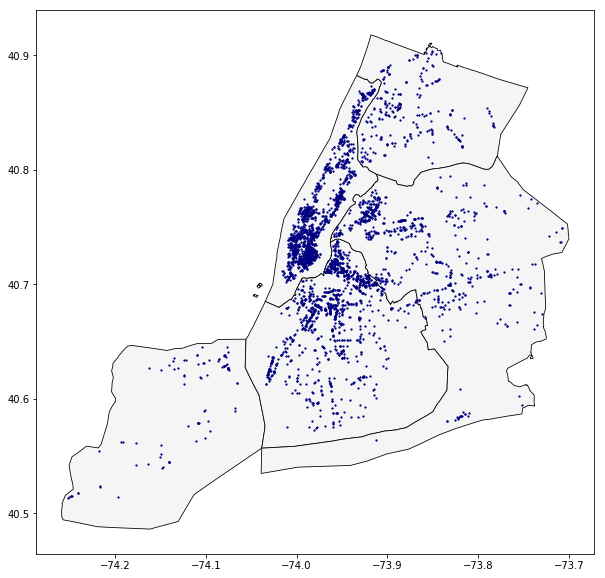

In [1118]:
fig, ax = plt.subplots(figsize=(10,10))
nyc_borough.plot( ax=ax , color='whitesmoke'  ,edgecolor='black' , linewidth=0.8)
y.plot( ax=ax ,markersize=1.5,color='navy')

pl.savefig('311complaintslocations.png')


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


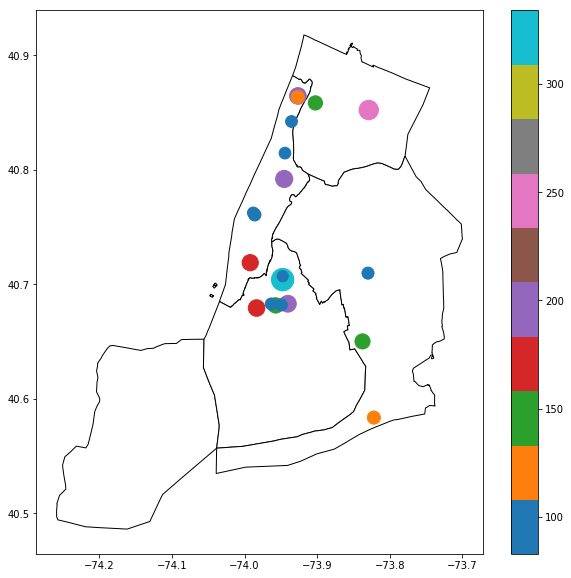

In [1115]:
fig, ax = plt.subplots(figsize=(10,10))
nyc_borough.plot( ax=ax , color='white'  ,edgecolor='black' , linewidth=1)
y[0:20].plot(column='Unique Key', ax=ax, markersize= 1.5 * y['Unique Key'],cmap='Vega10' ,legend=True)

pl.savefig('ct_initial.png')
pl.legend(title='311 counts legend')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


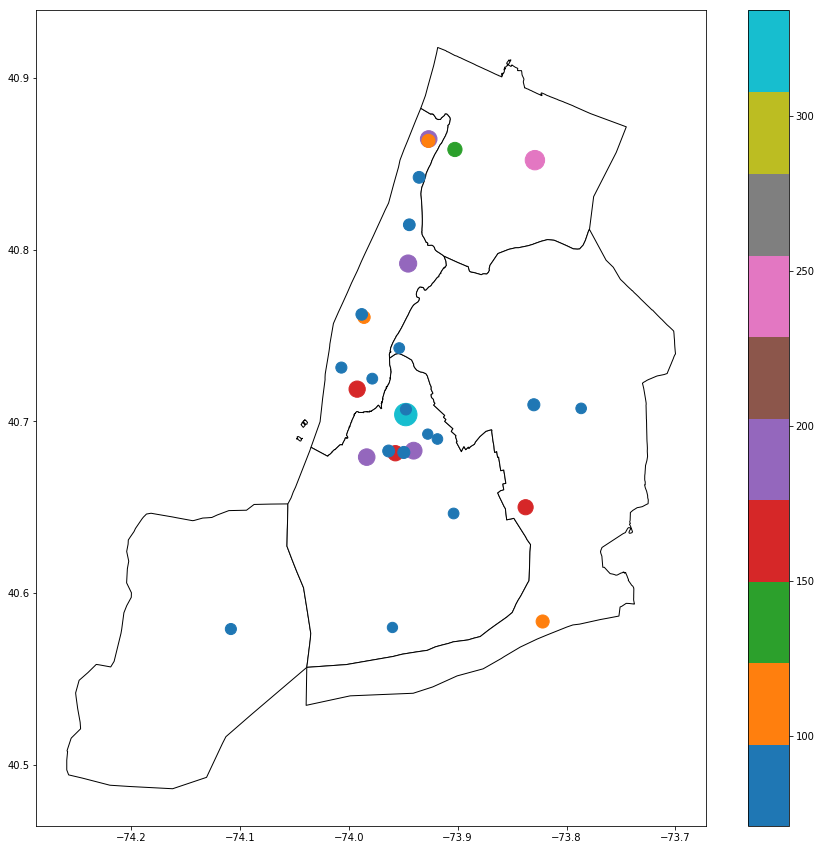

In [1117]:
fig, ax = plt.subplots(figsize=(15,15))
nyc_borough.plot( ax=ax , color='white'  ,edgecolor='black' , linewidth=1)
y[0:30].plot(column='Unique Key', ax=ax, markersize= 1.5 * y['Unique Key'],cmap='Vega10' ,legend=True)

pl.savefig('ct_initial.png')
pl.legend(title='311 counts legend')
pl.savefig('cp.png')

In [63]:
data_311_2016.Location.unique().size

3735

In [29]:
data_311_2016['Incident Zip'] = pd.to_numeric(data_311_2016['Incident Zip'] , errors='coerce')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
data_311_streets = data_311_2016

In [47]:
data_311_streets.dropna(subset=['Street Name'] , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
data_311_streets[['Street Name']].groupby(data_311_streets['Street Name']).count()

Street Name
Street Name                       
1 AVENUE                       252
10 AVENUE                      123
101 AVENUE                      13
101 STREET                       2
102 STREET                       7
103 STREET                       2
104 STREET                      15
108 STREET                       3
11 AVENUE                        3
11 STREET                        2
111 AVENUE                       4
12 AVENUE                        3
12 STREET                        1
123 STREET                       1
126 STREET                       1
127 STREET                       4
13 AVENUE                        6
14 AVENUE                        3
14 STREET                        6
144 AVENUE                       1
149 PLACE                        1
149 STREET                       1
15 AVENUE                        5
150 STREET                       2
16 AVENUE                        1
160 STREET                       1
162 STREET                       9
163 STREET                       2
164 STREET                       9
172 STREET                       2
...                            ...
WEST 86 STREET                   2
WEST 89 STREET                   1
WEST 9 STREET                   27
WEST 94 STREET                   2
WEST 95 STREET                   1
WEST BROADWAY                   32
WEST BURNSIDE AVENUE             1
WEST END AVENUE                 23
WEST FORDHAM ROAD                7
WEST HOUSTON STREET              3
WEST KINGSBRIDGE ROAD            4
WEST STREET                     42
WESTCHESTER AVENUE             302
WHITE PLAINS ROAD               22
WHITEPLAINS ROAD                 4
WILLIAM STREET                   6
WILLIS AVENUE                    6
WILLOUGHBY AVENUE                2
WILSON AVENUE                  111
WOODBINE STREET                  1
WOODHAVEN BOULEVARD              6
WOODRUFF AVENUE                  1
WOODSIDE AVENUE                 18
WOODWARD AVENUE                 22
WYCKOFF AVENUE                 123
WYCKOFF STREET                   1
WYKOFF AVENUE                    2
WYTHE AVENUE                    17
YELLOWSTON BOULEVARD             1
YORK AVENUE                     12

[957 rows x 1 columns]

In [37]:
data_311_2016[['Incident Zip']].groupby(data_311_2016['Incident Zip']).count()

Incident Zip
Incident Zip              
10001.0                167
10002.0                801
10003.0                606
10004.0                 12
10005.0                 14
10006.0                 12
10007.0                 16
10009.0                936
10010.0                120
10011.0                240
10012.0                272
10013.0                172
10014.0                347
10016.0                324
10017.0                 99
10018.0                 34
10019.0                449
10020.0                  2
10021.0                111
10022.0                101
10023.0                122
10024.0                 86
10025.0                221
10026.0                100
10027.0                186
10028.0                254
10029.0                315
10030.0                193
10031.0                298
10032.0                177
...                    ...
11375.0                 98
11377.0                154
11378.0                 27
11379.0                  4
11385.0                310
11411.0                 12
11412.0                  9
11413.0                  5
11414.0                164
11415.0                129
11416.0                 22
11417.0                 49
11418.0                135
11419.0                 70
11420.0                 60
11421.0                 48
11422.0                  8
11423.0                 15
11426.0                  1
11428.0                 19
11429.0                  1
11432.0                 58
11433.0                 98
11434.0                 43
11435.0                 17
11436.0                  1
11691.0                 12
11693.0                109
11694.0                142
11697.0                  1

[175 rows x 1 columns]

In [401]:
nyc_zip = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/zips/ZIP_CODE_040114.shp')
nyc_zip

ZIPCODE BLDGZIP        PO_NAME  POPULATION          AREA STATE    COUNTY  \
0     11436       0        Jamaica     18681.0  2.269930e+07    NY    Queens   
1     11213       0       Brooklyn     62426.0  2.963100e+07    NY     Kings   
2     11212       0       Brooklyn     83866.0  4.197210e+07    NY     Kings   
3     11225       0       Brooklyn     56527.0  2.369863e+07    NY     Kings   
4     11218       0       Brooklyn     72280.0  3.686880e+07    NY     Kings   
5     11226       0       Brooklyn    106132.0  3.940860e+07    NY     Kings   
6     11219       0       Brooklyn     92561.0  4.200274e+07    NY     Kings   
7     11210       0       Brooklyn     67067.0  4.788702e+07    NY     Kings   
8     11230       0       Brooklyn     80857.0  4.992670e+07    NY     Kings   
9     11204       0       Brooklyn     77354.0  4.355518e+07    NY     Kings   
10    10471       0          Bronx     23477.0  8.965141e+07    NY     Bronx   
11    10470       0          Bronx     14740.0  2.154346e+07    NY     Bronx   
12    10466       0          Bronx     68942.0  5.526249e+07    NY     Bronx   
13    10467       0          Bronx     97932.0  6.933617e+07    NY     Bronx   
14    10463       0          Bronx     70641.0  3.670338e+07    NY     Bronx   
15    10475       0          Bronx     40931.0  3.863330e+07    NY     Bronx   
16    10464       0          Bronx      4438.0  7.625748e+07    NY     Bronx   
17    10469       0          Bronx     65101.0  6.804089e+07    NY     Bronx   
18    10468       0          Bronx     72877.0  3.444760e+07    NY     Bronx   
19    10463       0          Bronx     70641.0  3.119702e+06    NY  New York   
20    10458       0          Bronx     79362.0  3.596881e+07    NY     Bronx   
21    10034       0       New York     39149.0  2.450389e+07    NY  New York   
22    10033       0       New York     54284.0  1.615605e+07    NY  New York   
23    10462       0          Bronx     75674.0  5.302251e+07    NY     Bronx   
24    10040       0       New York     41033.0  1.634074e+07    NY  New York   
25    10453       0          Bronx     77576.0  2.574851e+07    NY     Bronx   
26    10465       0          Bronx     42012.0  1.084237e+08    NY     Bronx   
27    10464       0          Bronx      4438.0  4.512531e+06    NY     Bronx   
28    10464       0          Bronx      4438.0  1.158795e+07    NY     Bronx   
29    10461       0          Bronx     50549.0  6.282406e+07    NY     Bronx   
..      ...     ...            ...         ...           ...   ...       ...   
233   10120       1       New York         0.0  3.517927e+04    NY  New York   
234   10278       1       New York         0.0  2.067060e+05    NY  New York   
235   10155       1       New York         0.0  2.478469e+04    NY  New York   
236   10043       1       New York         0.0  3.826236e+04    NY  New York   
237   10081       1       New York         0.0  3.024051e+04    NY  New York   
238   10096       1       New York         0.0  4.210611e+04    NY  New York   
239   10097       1       New York         0.0  6.582618e+04    NY  New York   
240   10196       1       New York         0.0  3.250244e+04    NY  New York   
241   10196       1       New York         0.0  3.154825e+03    NY  New York   
242   10275       1       New York         0.0  4.828042e+04    NY  New York   
243   10265       1       New York         0.0  1.722915e+04    NY  New York   
244   10045       1       New York         0.0  4.780899e+04    NY  New York   
245   10047       1       New York         0.0  1.014978e+04    NY  New York   
246   10047       1       New York         0.0  1.014978e+04    NY  New York   
247   10080       1       New York         0.0  7.711145e+04    NY  New York   
248   10203       1       New York         0.0  3.722688e+04    NY  New York   
249   10259       1       New York         0.0  2.106431e+04    NY  New York   
250   10260       1       New York         0.0  5.251474e+04    NY  New York   
251 

In [283]:
nyc_ct = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/ct/geo_export_0b44643e-35ee-40cc-9357-1e7be61a32d4.shp')


In [337]:
nyc_ct1 = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/ct/geo_export_0b44643e-35ee-40cc-9357-1e7be61a32d4.shp')


In [338]:
nyc_ct1 = nyc_ct1.to_crs(epsg=2263)

In [280]:
nyc_zip1 = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/zips/ZIP_CODE_040114.shp')

In [135]:

nyc_b = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/borough/geo_export_b2f22db8-9cea-4fce-83a8-9f2fdc48c86a.shp')
#nyc_b.crs = from_epsg(4326)

In [168]:
y = x_gpd.sort_values(by='Unique Key', ascending=False)


In [496]:
y = y.to_crs(epsg=2263)
y.crs

{'init': 'epsg:2263', 'no_defs': True}

In [58]:
data_311_2016_gpd = geopandas.GeoDataFrame(data_311_2016)

In [59]:
data_311_2016_gpd.crs = from_epsg(4326)

In [ ]:
data_311_2016_gpd = data_311_2016_gpd.to_crs(epsg=2263)

In [131]:
nyc_zip = nyc_zip.to_crs(epsg=2263)

In [299]:
ct_bars  = geopandas.sjoin(y,nyc_ct )

In [312]:
ct_bars_gby_ct = ct_bars.groupby(['boro_ct201'])[['Unique Key']].sum()

In [313]:
ct_bars_gby_ct.reset_index(inplace=True)

In [314]:
nyc_ct.reset_index(inplace=True)

In [322]:
nyc_ct =nyc_ct.merge(ct_bars_gby_ct)

In [406]:
nyc_ct

index  index_right boro_code boro_ct201      boro_name cdeligibil  \
0        1            1         1    1009800      Manhattan          I   
1        2            2         1    1010000      Manhattan          I   
2        3            3         1    1010200      Manhattan          I   
3        4            4         1    1010400      Manhattan          I   
4        5            5         1    1011300      Manhattan          I   
5        6            6         1    1011402      Manhattan          I   
6        8            8         1    1014000      Manhattan          I   
7        9            9         1    1014801      Manhattan          I   
8       10           10         1    1018400      Manhattan          E   
9       11           11         1    1019000      Manhattan          I   
10      13           13         3    3006900       Brooklyn          I   
11      14           14         1    1024900      Manhattan          E   
12      15           15         1    1026100      Manhattan          E   
13      16           16         1    1026300      Manhattan          E   
14      18           18         1    1026900      Manhattan          E   
15      19           19         1    1027700      Manhattan          E   
16      20           20         3    3000501       Brooklyn          I   
17      21           21         3    3002000       Brooklyn          I   
18      22           22         3    3004100       Brooklyn          I   
19      23           23         3    3005800       Brooklyn          E   
20      24           24         3    3006000       Brooklyn          I   
21      25           25         3    3006700       Brooklyn          I   
22      26           26         3    3026900       Brooklyn          E   
23      28           28         3    3007600       Brooklyn          E   
24      31           31         3    3009800       Brooklyn          E   
25      32           32         3    3010100       Brooklyn          I   
26      33           33         3    3010200       Brooklyn          E   
27      34           34         3    3010400       Brooklyn          E   
28      36           36         3    3011000       Brooklyn          E   
29      37           37         3    3011400       Brooklyn          I   
..     ...          ...       ...        ...            ...        ...   
960   2108         2108         1    1007100      Manhattan          I   
961   2109         2109         1    1007300      Manhattan          I   
962   2111         2111         2    2039700          Bronx          I   
963   2112         2112         2    2006200          Bronx          E   
964   2115         2115         1    1017300      Manhattan          I   
965   2117         2117         2    2041900          Bronx          E   
966   2121         2121         2    2004300          Bronx          E   
967   2122         2122         2    2038302          Bronx          E   
968   2125         2125         2    2023301          Bronx          E   
969   2127         2127         2    2006300          Bronx          I   
970   2129         2129         1    1004900      Manhattan          I   
971   2131         2131         2    2038700          Bronx          I   
972   2132         2132         2    2038900          Bronx          E   
973   2133         2133         2    2037300          Bronx          E   
974   2134         2134         2    2039100          Bronx          E   
975   2137         2137         1    1019500      Manhattan          I   
976   2138         2138         1    1019900      Manhattan          I   
977   2140         2140         4    4022002         Queens          I   
978   2141         2141         4    4071100         Queens          I   
979   2142         2142         4    4072300         Queens          I   
980   2143         2143         4    4073700         Queens          I   
981   2147         2147         2    2022902          Bronx          E   
982   215

In [862]:
pl.legend?

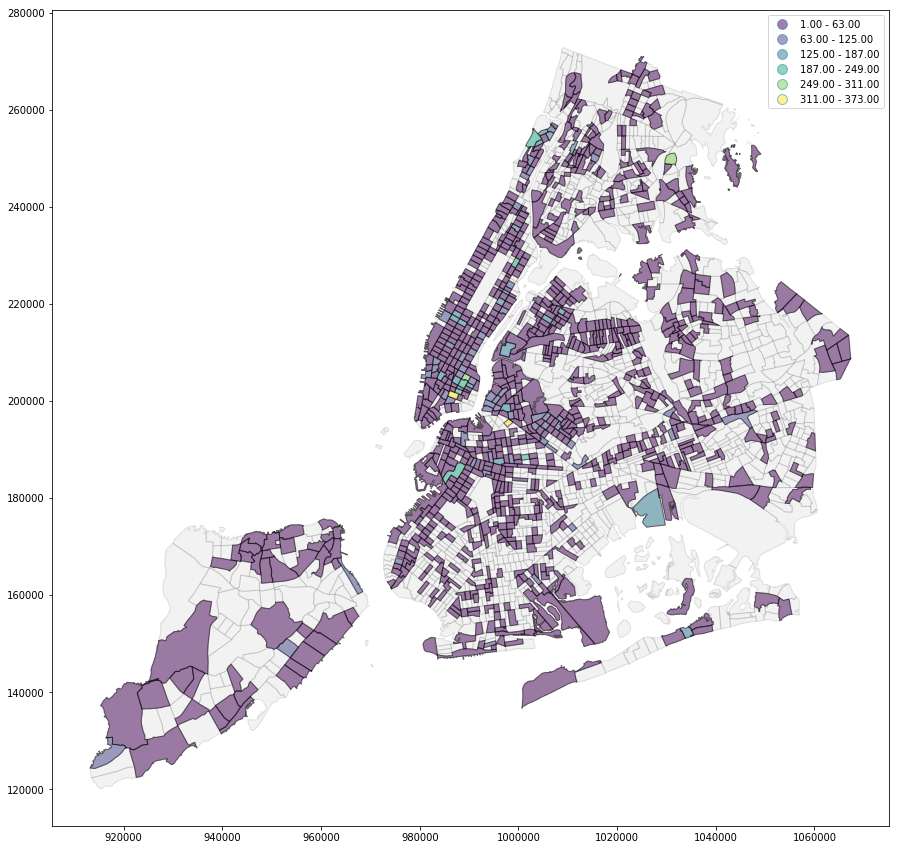

In [861]:
sns.reset_orig()
fig, ax = plt.subplots(figsize=(15,15))
nyc_ct1.plot( ax=ax , color='grey' ,alpha=0.1 ,edgecolor='black')
nyc_ct.plot(column='Unique Key', ax=ax , edgecolor='black' ,alpha=0.5, cmap='viridis', legend=True , scheme = 'Equal_interval',k=6)
#nyc_streets.plot(ax=ax,alpha=0.1)

#y.plot(column='Unique Key', ax=ax,markersize=2.00 , cmap='viridis_r' , legend=True, scheme = 'Equal_interval', k = 5)
# plot the noisiest points here:
pl.savefig('ct_initial.png')
pl.legend(title='311 counts legend')

In [302]:
temp=y[["Unique Key"]]
temp['station_id']=station_id.index


In [403]:
nyc_ct[nyc_ct['boro_name'] == 'Manhattan'].sort_values(by='ctlabel' , ascending=False)

index  index_right boro_code boro_ct201  boro_name cdeligibil  ct2010  \
916   2025         2025         1    1009900  Manhattan          I  009900   
0        1            1         1    1009800  Manhattan          I  009800   
548   1226         1226         1    1009700  Manhattan          I  009700   
679   1530         1530         1    1009600  Manhattan          I  009600   
798   1785         1785         1    1009500  Manhattan          I  009500   
635   1427         1427         1    1009300  Manhattan          I  009300   
355    809          809         1    1009200  Manhattan          I  009200   
583   1309         1309         1    1009100  Manhattan          I  009100   
396    893          893         1    1009000  Manhattan          I  009000   
830   1864         1864         1    1000900  Manhattan          I  000900   
634   1426         1426         1    1008900  Manhattan          I  008900   
395    892          892         1    1008800  Manhattan          I  008800   
932   2058         2058         1    1008700  Manhattan          I  008700   
478   1067         1067         1    1008603  Manhattan          I  008603   
540   1210         1210         1    1008400  Manhattan          I  008400   
667   1510         1510         1    1008300  Manhattan          I  008300   
476   1062         1062         1    1008200  Manhattan          I  008200   
957   2104         2104         1    1008100  Manhattan          I  008100   
391    881          881         1    1008000  Manhattan          I  008000   
827   1853         1853         1    1000800  Manhattan          E  000800   
721   1623         1623         1    1007900  Manhattan          I  007900   
401    898          898         1    1007800  Manhattan          I  007800   
956   2103         2103         1    1007700  Manhattan          I  007700   
797   1784         1784         1    1007600  Manhattan          I  007600   
642   1447         1447         1    1007500  Manhattan          I  007500   
438    978          978         1    1007400  Manhattan          I  007400   
961   2109         2109         1    1007300  Manhattan          I  007300   
437    977          977         1    1007200  Manhattan          I  007200   
960   2108         2108         1    1007100  Manhattan          I  007100   
418    934          934         1    1007000  Manhattan          I  007000   
..     ...          ...       ...        ...        ...        ...     ...   
793   1780         1780         1    1013300  Manhattan          I  013300   
489   1092         1092         1    1013200  Manhattan          I  013200   
364    826          826         1    1013100  Manhattan          I  013100   
812   1819         1819         1    1001300  Manhattan          I  001300   
796   1783         1783         1    1012900  Manhattan          I  012900   
795   1782         1782         1    1012700  Manhattan          I  012700   
894   1989         1989         1    1012600  Manhattan          I  012600   
276    638          638         1    1012500  Manhattan          I  012500   
488   1091         1091         1    1012400  Manhattan          I  012400   
714   1611         1611         1    1012200  Manhattan          I  012200   
332    762          762         1    1012100  Manhattan          E  012100   
275    637          637         1    1011900  Manhattan          I  011900   
893   1988         1988         1    1011800  Manhattan          I  011800   
460   1019         1019         1    1011600  Manhattan          I  011600   
444    989          989         1    1011500  Manhattan          I  011500   
5        6            6         1    1011402  Manhattan          I  011402   
334    766          766         1    1011401  Manhattan          I  011401   
4        5            5         1    1011300  Manhattan          I  011300   
680   1532         1532         1    1011202  Manhattan          I  011202   
636   1428         1428    

In [871]:
nyc_ct['complaints_std']  = (( nyc_ct['Unique Key'] - nyc_ct['Unique Key'].mean()) / nyc_ct['Unique Key'].std())

## Performing Spatial Autocorrelation

In [364]:
%mkdir Output

In [655]:
path='Output/bars_noise_311.shp'
nyc_ct.to_file(path)

In [366]:
import pysal as ps

In [367]:
qW_CT = ps.queen_from_shapefile(path)

Island ids:  [37, 50, 83, 84, 93, 135, 139, 161, 267, 300, 313, 335, 420, 499, 550, 566, 586, 587, 589, 767, 878]


In [368]:
Wmatrix, ids = qW_CT.full()

In [369]:
qW_CT.transform = 'r'

In [371]:
AnnualComplaints = nyc_ct['Unique Key']

AnnualComplaintsLag = ps.lag_spatial(qW_CT, AnnualComplaints)

In [867]:
AnnualComplaintsLagQ10 = ps.Quantiles(AnnualComplaintsLag, k=10)
AnnualComplaintsLagQ10

                 Quantiles                 
 
 Lower            Upper               Count
          x[i] <=   1.333               105
  1.333 < x[i] <=   2.500               101
  2.500 < x[i] <=   4.570                91
  4.570 < x[i] <=   7.000               104
  7.000 < x[i] <=  10.250                95
 10.250 < x[i] <=  15.000               100
 15.000 < x[i] <=  22.500                98
 22.500 < x[i] <=  33.000               100
 33.000 < x[i] <=  52.333                98
 52.333 < x[i] <= 256.000                98

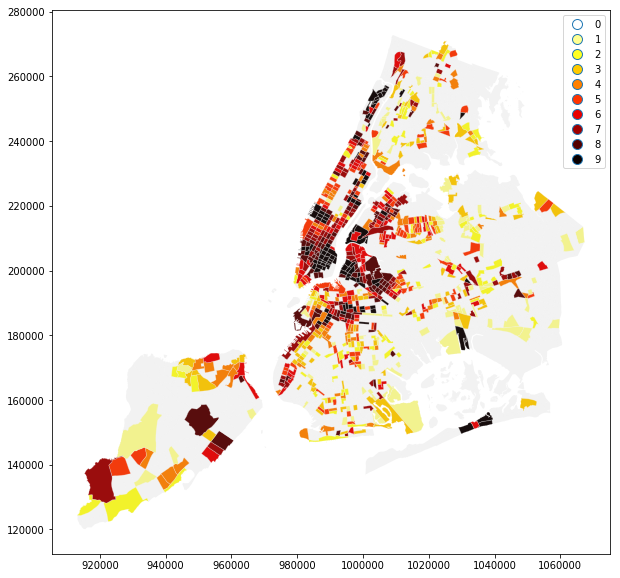

In [870]:
f, ax = plt.subplots(figsize=(10,10))
nyc_ct.assign(cl=AnnualComplaintsLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)

nyc_ct1.plot( ax=ax , color='grey' ,alpha=0.1 ,edgecolor='white')
pl.savefig('ct2.png')
pl.legend()

In [378]:
b,a = np.polyfit(AnnualComplaints, AnnualComplaintsLag, 1)
b,a

(0.22822898721760101, 15.702080252320131)

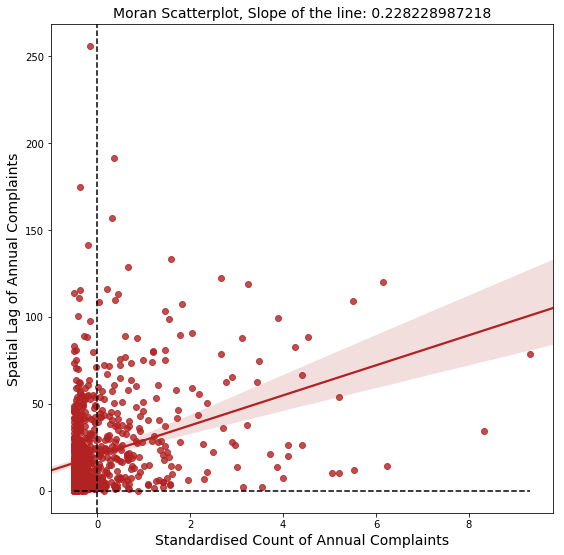

In [902]:
import seaborn as sns


f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=nyc_ct.complaints_std, y=AnnualComplaintsLag,color='firebrick')
# Add vertical and horizontal lines
#plt.axvline(0, c='k', alpha=0.5)
#plt.axhline(0, c='k', alpha=0.5)
plt.hlines(nyc_ct.complaints_std.mean(), nyc_ct.complaints_std.min(), nyc_ct.complaints_std.max(), linestyle='--')
plt.axvline(nyc_ct.complaints_std.mean(), AnnualComplaintsLag.min(), AnnualComplaintsLag.max(), linestyle='--' ,color='k')
# Display
plt.title('Moran Scatterplot, Slope of the line: ' + str(b),fontsize=14)
plt.ylabel('Spatial Lag of Annual Complaints',fontsize=14)
plt.xlabel('Standardised Count of Annual Complaints',fontsize=14);
plt.show()
pl.savefig('moranplot.png')

In [893]:
plt.ylabel?

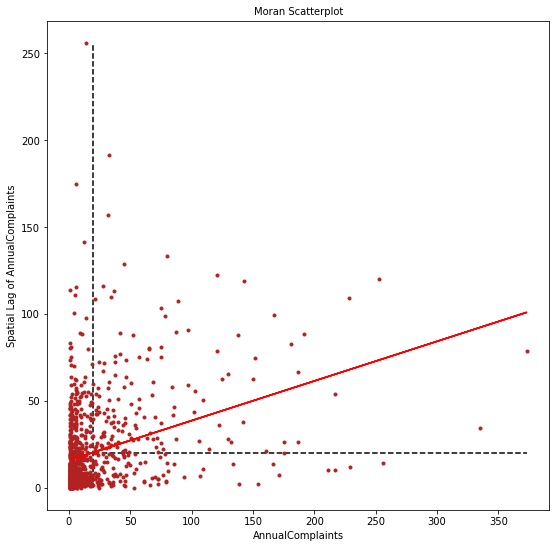

In [894]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(AnnualComplaints, AnnualComplaintsLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(AnnualComplaints.mean(), AnnualComplaintsLag.min(), AnnualComplaintsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(AnnualComplaints.mean(), AnnualComplaints.min(), AnnualComplaints.max(), linestyle='--')
plt.plot(AnnualComplaints, a + b*AnnualComplaints, 'r')
# red line of best fit using global I as slope
plt.plot(AnnualComplaints, a + b*AnnualComplaints, 'r')
plt.title('Moran Scatterplot',fontsize=10)
plt.ylabel('Spatial Lag of AnnualComplaints')
plt.xlabel('AnnualComplaints');

In [380]:
I_AnnualComplaints = ps.Moran(AnnualComplaints, qW_CT)

In [382]:
I_AnnualComplaints.I , I_AnnualComplaints.p_sim

(0.22923755579085198, 0.001)

In [783]:
I_AnnualComplaints.EI

-0.0010111223458038423

In [1122]:
I_AnnualComplaints.sim?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


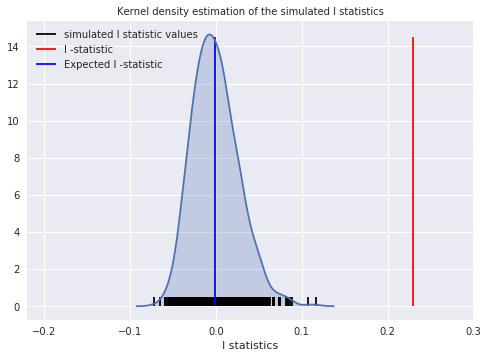

In [1190]:
import seaborn as sns
sns.set()
sns.kdeplot(I_AnnualComplaints.sim, shade=True)
plt.vlines(I_AnnualComplaints.sim, 0, 0.5, label='simulated I statistic values')
plt.vlines(I_AnnualComplaints.I, 0, 14.5, 'r',label='I -statistic')
plt.vlines(I_AnnualComplaints.EI, 0, 14.5, 'b',label='Expected I -statistic')
plt.xlim([-0.22, 0.3])
plt.legend(loc='upper left')
plt.title('Kernel density estimation of the simulated I statistics',fontsize=10)
plt.xlabel('I statistics');
plt.savefig('kdemi.png')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


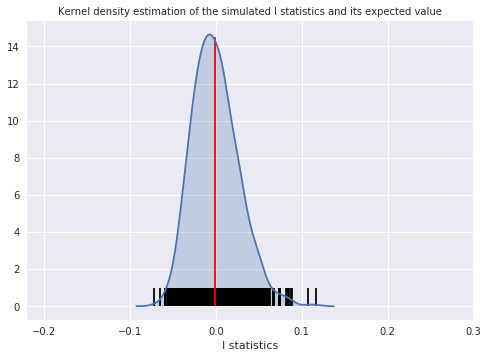

In [1121]:
sns.kdeplot(I_AnnualComplaints.sim, shade=True)
plt.vlines(I_AnnualComplaints.sim, 0, 1)
plt.vlines(I_AnnualComplaints.EI, 0, 14.5, 'r')
plt.xlim([-0.22, 0.3])
plt.title('Kernel density estimation of the simulated I statistics and its expected value',fontsize=10)
plt.xlabel('I statistics');
plt.savefig('kdemi2.png')

## Local Moran's I

In [383]:
LMo_AnnualComplaints = ps.Moran_Local(AnnualComplaints.values, qW_CT ,permutations=999)

In [384]:
LMo_AnnualComplaints.Is[0:5], LMo_AnnualComplaints.p_sim[0:5]

(array([-0.02106046, -0.01502411,  0.13219613, -0.0420787 ,  0.03749429]),
 array([ 0.385,  0.302,  0.327,  0.134,  0.406]))

In [386]:
sigs = AnnualComplaints[LMo_AnnualComplaints.p_sim <= .001]
W_sigs = AnnualComplaintsLag[LMo_AnnualComplaints.p_sim <= .001]
insigs = AnnualComplaints[LMo_AnnualComplaints.p_sim > .001]
W_insigs = AnnualComplaintsLag[LMo_AnnualComplaints.p_sim > .001]

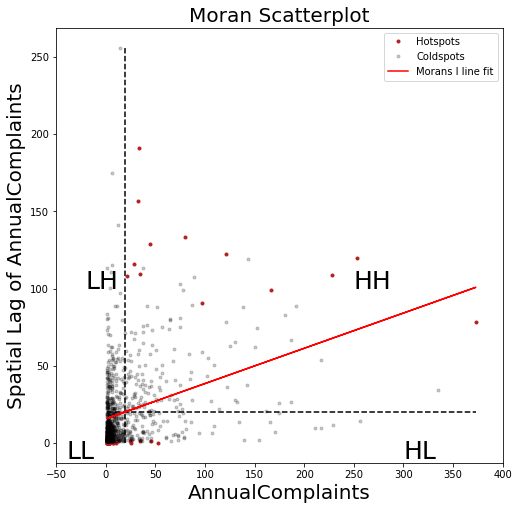

In [1123]:
sns.reset_orig()
f, ax = plt.subplots(figsize=(8, 8))
plt.plot(sigs, W_sigs, '.', color='firebrick',label='Hotspots')
plt.plot(insigs, W_insigs, '.k', alpha=.2,label='Coldspots')
#plt.text(s='$I = %.3f$' % I_AnnualComplaints.I, x=120000, y=5000, fontsize=18)
plt.vlines(AnnualComplaints.mean(), AnnualComplaintsLag.min(), AnnualComplaintsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(AnnualComplaintsLag.mean(), AnnualComplaints.min(), AnnualComplaints.max(), linestyle='--')
plt.plot(AnnualComplaints, a + b*AnnualComplaints, 'r',label='Morans I line fit')
plt.legend()
ax.set_xlim(-50, 400)
ax.set_xlim(-50, 400)
plt.text(250,100, "HH", fontsize=25)
plt.text(-40, -10, "LL", fontsize=25)
plt.text(-20, 100, "LH", fontsize=25)
plt.text(300, -10, "HL", fontsize=25)
plt.title('Moran Scatterplot',fontsize=20)
plt.ylabel('Spatial Lag of AnnualComplaints',fontsize=20)
plt.xlabel('AnnualComplaints',fontsize=20);
plt.savefig('clusteringmoran.png')

In [1169]:
sig1 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [1167]:
sig1 = LMo_AnnualComplaints.p_sim < 0.01
hotspots = LMo_AnnualComplaints.q==1 * sig
coldspots = LMo_AnnualComplaints.q==3 * sig
spatial_outliers1 = LMo_AnnualComplaints.q==2 * sig
spatial_outliers2 = LMo_AnnualComplaints.q==4 * sig
print ("Number of Hotspots:", hotspots.sum())
print ("Number of Coldspots:", coldspots.sum())

Number of Hotspots: 29
Number of Coldspots: 63


In [1138]:
hotcold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2,

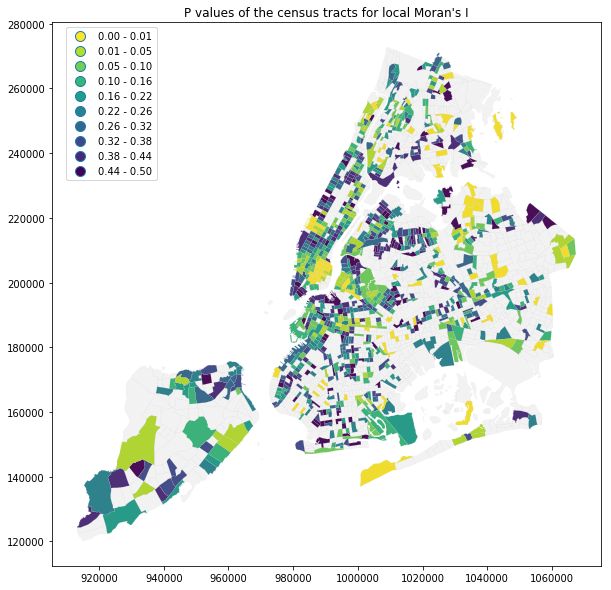

In [1210]:
from matplotlib import colors
sns.reset_orig()
hcmap = colors.ListedColormap(['lightgray','firebrick','midnightblue'])
hotcold = hotspots*1 + coldspots*2 
HotCold_Categories=[]
for i in range(len(hotcold)):
    if hotcold[i] == 1:
        HotCold_Categories.append('Hotspots')
    elif hotcold[i] == 2:
        HotCold_Categories.append('Coldspots')
    elif hotcold[i] == 3:
        HotCold_Categories.append('Spatial Outliers: High-Low')
    elif hotcold[i] == 4:
        HotCold_Categories.append('Spatial Outliers: Low-High')
    else:
        HotCold_Categories.append('Neutral')
        
    
label_list = ['N' ,'H' ,'c']
f = pl.figure(figsize(10,10))
ax = nyc_ct.assign(cl=LMo_AnnualComplaints.p_sim).plot(column='cl',k=10,
         cmap='viridis_r', linewidth=0.1, scheme='Quantiles',
        edgecolor='white',legend=True)
nyc_ct1.plot(linewidth=0.1, ax=ax, 
        edgecolor='black', alpha=0.1,color='grey')
#ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.0, 0.2, 0.2, 0.8))

pl.title("P values of the census tracts for local Moran's I");
pl.savefig('pvaluemi.png')


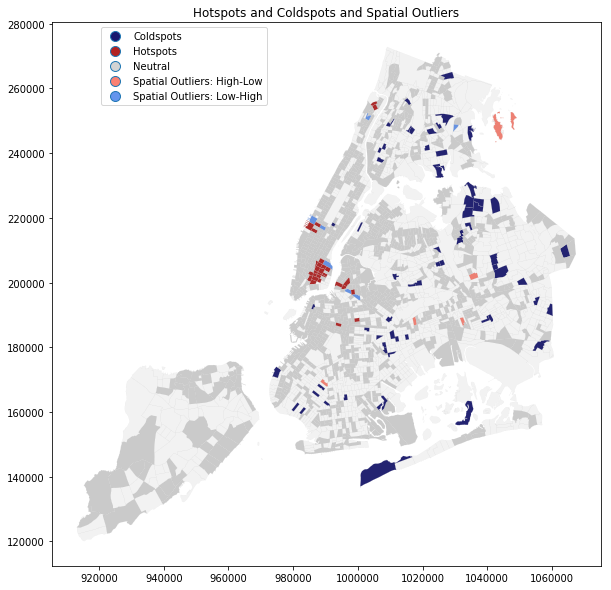

In [1193]:
from matplotlib import colors

hcmap = colors.ListedColormap(['midnightblue','firebrick','lightgray','salmon' ,'cornflowerblue'])
hotcold = hotspots*1 + coldspots*2 + spatial_outliers1*3 + spatial_outliers2*4
HotCold_Categories=[]
for i in range(len(hotcold)):
    if hotcold[i] == 1:
        HotCold_Categories.append('Hotspots')
    elif hotcold[i] == 2:
        HotCold_Categories.append('Coldspots')
    elif hotcold[i] == 3:
        HotCold_Categories.append('Spatial Outliers: Low-High')
    elif hotcold[i] == 4:
        HotCold_Categories.append('Spatial Outliers: High-Low')
    else:
        HotCold_Categories.append('Neutral')
        
    
label_list = ['N' ,'H' ,'c']
f = pl.figure(figsize(10,10))
ax = nyc_ct.assign(cl=HotCold_Categories).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, 
        edgecolor='white',legend=True)
nyc_ct1.plot(linewidth=0.1, ax=ax, 
        edgecolor='black', alpha=0.1,color='grey')
plt.legend(ax=ax,loc = 'upper left')
#ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.2, 0.2, 0.2, 0.8))

pl.title("Hotspots and Coldspots and Spatial Outliers");
pl.savefig('hcs.png')


In [659]:
thresh = ps.min_threshold_dist_from_shapefile("Output/bars_noise_311.shp")
thresh

11030.776664243993

In [692]:
points = data_311_2016['lonlat'].values

In [694]:
points[0]

(-73.915276123925636, 40.760454124547827)

In [704]:
points = [(10, 10), (20, 10), (40, 10), (15, 20), (30, 20), (30, 30)]
wid = ps.weights.DistanceBand(points,0,binary=False)    

Island ids:  [0, 1, 2, 3, 4, 5]


In [745]:
thresh = ps.min_threshold_dist_from_shapefile("Output/bars_noise_311.shp")
thresh

11030.776664243993

In [746]:
 wt = ps.threshold_binaryW_from_shapefile("Output/bars_noise_311.shp", thresh)

In [747]:
wt.remap_ids(nyc_ct['boro_ct201'])

In [749]:
wt.transform = "B"

In [728]:
nyc_ct.head()

index  index_right boro_code boro_ct201  boro_name cdeligibil  ct2010  \
0      1            1         1    1009800  Manhattan          I  009800   
1      2            2         1    1010000  Manhattan          I  010000   
2      3            3         1    1010200  Manhattan          I  010200   
3      4            4         1    1010400  Manhattan          I  010400   
4      5            5         1    1011300  Manhattan          I  011300   

  ctlabel ntacode                  ntaname  puma    shape_area   shape_leng  \
0      98    MN19  Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811   
1     100    MN19  Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737   
2     102    MN17    Midtown-Midtown South  3807  1.860993e+06  5687.802439   
3     104    MN17    Midtown-Midtown South  3807  1.864600e+06  5693.036367   
4     113    MN17    Midtown-Midtown South  3807  1.890907e+06  5699.860641   

                                            geometry  Unique Key  
0  POLYGON ((994133.5070190424 214848.8975829605,...          48  
1  POLYGON ((993108.3057861348 216013.1307982849,...          14  
2  POLYGON ((992216.5391845678 216507.687011669, ...           1  
3  POLYGON ((991325.8815917961 217001.6885985838,...          15  
4  POLYGON ((988650.2766113301 214286.402221621, ...          11

In [750]:
wt.min_neighbors

1

In [751]:
wt.neighbors

{'1000600': ['1000800',
  '3018100',
  '1003700',
  '3000301',
  '3123700',
  '1002202',
  '1002602',
  '1006800',
  '1006100',
  '3018700',
  '3003900',
  '3019300',
  '1006500',
  '3019700',
  '1003800',
  '1004200',
  '1001501',
  '1005600',
  '1003601',
  '3051300',
  '3052500',
  '1004900',
  '3006900',
  '1005700',
  '3052300',
  '1031704',
  '1004800',
  '3055300',
  '3000700',
  '1002601',
  '1004500',
  '3051700',
  '1006900',
  '1001300',
  '1006700',
  '1001502',
  '3054300',
  '3002100',
  '1004100',
  '3003300',
  '3054900',
  '1003602',
  '1002900',
  '1001600',
  '3000501',
  '3055500',
  '3001500',
  '1004700',
  '1005501',
  '1004000',
  '1031703',
  '1003001',
  '1008100',
  '1007500',
  '3055700',
  '1000700',
  '1006400',
  '3055100',
  '1007300',
  '1006600',
  '1004300',
  '1005200',
  '1002100',
  '1005900',
  '3051900',
  '3000502',
  '3004300',
  '1006300',
  '1002400',
  '1003002',
  '3004500',
  '3006700',
  '3000900',
  '1003300',
  '1002201',
  '1003900',
 

In [732]:
from pysal.esda.getisord import G

In [743]:
y = nyc_ct['Unique Key'].values


SyntaxError: invalid syntax (<ipython-input-743-aac477429515>, line 2)

In [786]:
g = G(y, wt)
g.G , g.p_sim, g.EG

(0.12462429626626316, 0.001, 0.063984639111029404)

In [826]:
g1 = G(y, wt, permutations=999)

In [827]:
g1.p_sim

0.001

In [828]:
g.p_norm

0.49999779965613966

In [838]:
nyc_ct.shape

(990, 15)

In [839]:
from pysal.esda.getisord import G_Local
lg = G_Local(y, wt)

In [840]:
lg.n

990

In [1025]:
X = lg.z_sim[sig_lg] >0 
X.shape

(388,)

In [1026]:
sig_lg = lg.p_sim < 0.01
hotspotsG = lg.z_sim[sig_lg] >0 
coldspotsG = lg.z_sim[sig_lg] < 0 

insig_lg = lg.p_sim >= 0.01
neutralG = lg.z_sim[insig_lg]
print ("Number of Hotspots:", hotspotsG.sum())
print ("Number of Coldspots:", coldspotsG.sum())
print ("Number of neutral spots:", neutralG.sum())

Number of Hotspots: 186
Number of Coldspots: 202
Number of neutral spots: -174.97522647


In [1008]:
hotcold1.shape

(388,)

In [842]:
lgstar = G_Local(y, wt, star=True)

In [986]:
sig = lg.p_sim<0.005
sig.size

990

In [990]:
Zscores_sig = lg.z_sim[sig]

In [997]:
hotspots_G = Zscores_sig>0

In [999]:
coldspots_G = Zscores_sig < 0
coldspots_G

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True, False,

In [1029]:
# gives the p values
p_values = lg.p_sim
p_shape = p_values>0.01


array([False, False, False, False, False,  True,  True,  True,  True,  True], dtype=bool)

In [1035]:
z_values = lg.z_sim
cluster_type = []
for i in range(len(z_values)):
    if lg.p_sim[i] < 0.01:
        if lg.z_sim[i] > 0:
            cluster_type.append('hotspot')
        else:
            cluster_type.append('coldspot')
    else:
        cluster_type.append('neutralspot')

In [1043]:
z_valuesstar = lgstar.z_sim
cluster_star_type = []
for i in range(len(z_values)):
    if lgstar.p_sim[i] < 0.01:
        if lgstar.z_sim[i] > 0:
            cluster_star_type.append('hotspot')
        else:
            cluster_star_type.append('coldspot')
    else:
        cluster_star_type.append('neutralspot')

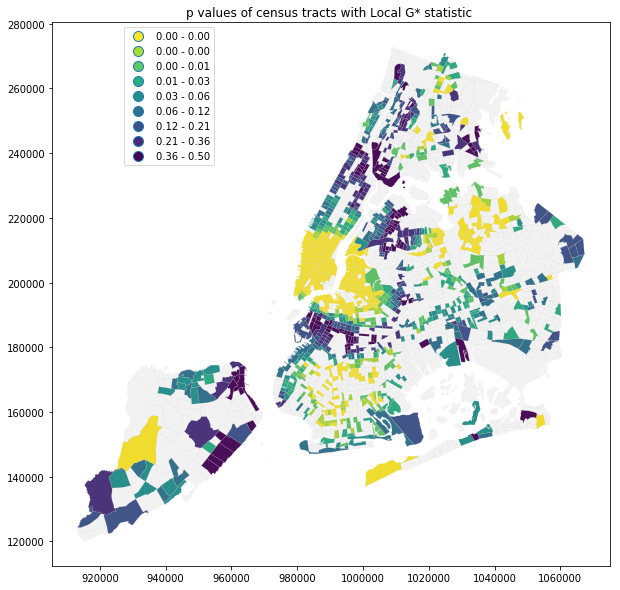

In [1203]:
from matplotlib import colors
#plotting areas of statitstical significance
fig, axes = plt.subplots(figsize=(10,10))
hcmap = colors.ListedColormap(['darkorange','darkgreen','grey'])
significance_colors = p_shape * 1

nyc_ct.assign(cl=lgstar.p_sim).plot(column='cl', 
         cmap= 'viridis_r', linewidth=0.1, k=10,scheme='Quantiles',
        edgecolor='white',legend=True,ax=axes)
nyc_ct1.plot(linewidth=0.1, 
        edgecolor='black', alpha=0.1,color='grey',ax=axes
            )
#ax.set_axis_off()

leg = axes.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.8))
pl.title("p values of census tracts with Local G* statistic ");
pl.savefig('lgstar.png')

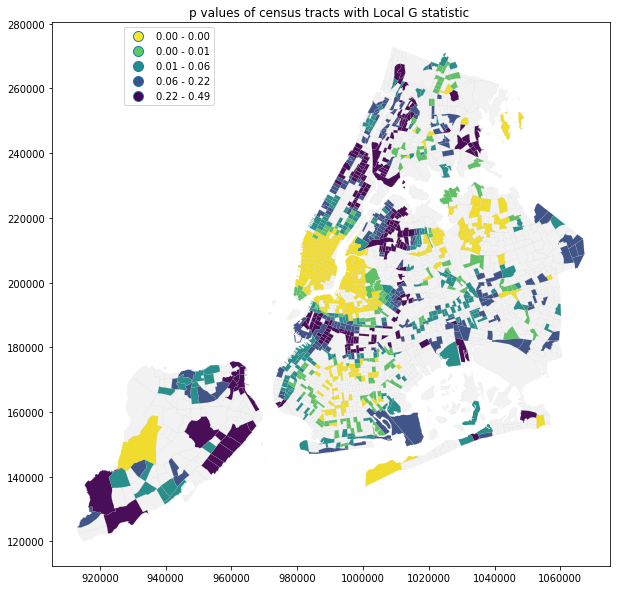

In [1208]:
from matplotlib import colors
#plotting areas of statitstical significance
fig, axes = plt.subplots(figsize=(10,10))
hcmap = colors.ListedColormap(['darkorange','darkgreen','grey'])
significance_colors = p_shape * 1

nyc_ct.assign(cl=lg.p_sim).plot(column='cl', 
         cmap= 'viridis_r', linewidth=0.1, k=5,scheme='Quantiles',
        edgecolor='white',legend=True,ax=axes)
nyc_ct1.plot(linewidth=0.1, 
        edgecolor='black', alpha=0.1,color='grey',ax=axes
            )
#ax.set_axis_off()
leg = axes.get_legend()
leg.set_bbox_to_anchor((0.1, 0.2, 0.2, 0.8))

pl.title("p values of census tracts with Local G statistic ");
pl.savefig('lg.png')

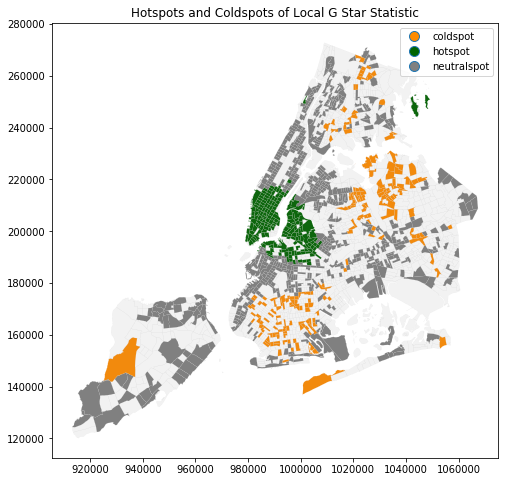

In [1065]:
from matplotlib import colors
#plotting areas of statitstical significance
fig, axes = plt.subplots(figsize=(8,8))
hcmap = colors.ListedColormap(['darkorange','darkgreen','grey'])
significance_colors = p_shape * 1

nyc_ct.assign(cl=cluster_star_type).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, 
        edgecolor='white',legend=True,ax=axes)
nyc_ct1.plot(linewidth=0.1, 
        edgecolor='black', alpha=0.1,color='grey',ax=axes
            )
#ax.set_axis_off()


pl.title("Hotspots and Coldspots of Local G Star Statistic");
pl.savefig('lgstar.png')

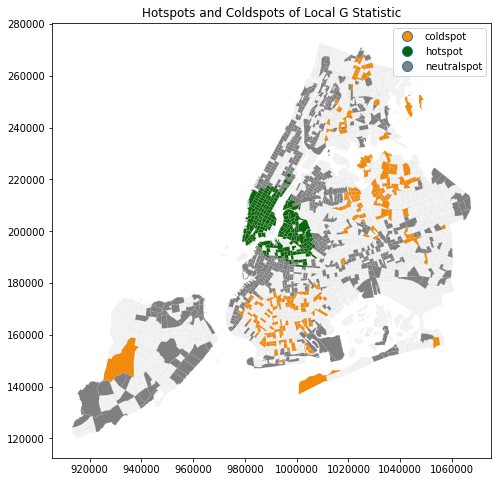

In [1062]:
from matplotlib import colors
#plotting areas of statitstical significance

hcmap = colors.ListedColormap(['darkorange','darkgreen','grey'])
significance_colors = p_shape * 1

f = pl.figure(figsize(8,8))
ax = nyc_ct.assign(cl=cluster_type).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, 
        edgecolor='white',legend=True)
nyc_ct1.plot(linewidth=0.1, ax=ax, 
        edgecolor='black', alpha=0.1,color='grey')
#ax.set_axis_off()


pl.title("Hotspots and Coldspots of Local G Statistic");
pl.savefig('lgstat.png')

In [ ]:
from matplotlib import colors
#plotting areas of statitstical significance

hcmap = colors.ListedColormap(['firebrick','midnightblue'])
significance_colors = p_shape * 1

f = pl.figure(figsize(8,6))
ax = nyc_ct.assign(cl=significance_colors).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, 
        edgecolor='white',legend=True)
nyc_ct1.plot(linewidth=0.1, ax=ax, 
        edgecolor='black', alpha=0.1,color='grey')
#ax.set_axis_off()


pl.title("Visualising the statistical significance p values of local G statitstics");


In [ ]:
from matplotlib import colors
#plotting areas of statitstical significance
p_values = lgstar.p_sim
p_shape = p_values>0.01
hcmap = colors.ListedColormap(['firebrick','midnightblue'])
significance_colors = p_shape * 1

f = pl.figure(figsize(8,6))
ax = nyc_ct.assign(cl=significance_colors).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, 
        edgecolor='white',legend=True)
nyc_ct1.plot(linewidth=0.1, ax=ax, 
        edgecolor='black', alpha=0.1,color='grey')
#ax.set_axis_off()


pl.title("Visualising the statistical significance p values of local G* statitstics");

In [ ]:
pl.savefig('hcs.png')
f, ax = plt.subplots(figsize=(9, 9))
nyc_ct.assign(cl=lg.z_sim).plot(column='cl', 
        k=8, cmap='viridis_r', linewidth=0.1, ax=ax,scheme='Equal_interval',
        edgecolor='white', legend=True)
nyc_ct1.plot(linewidth=0.1, ax=ax, 
        edgecolor='black', alpha=0.1,color='grey')
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles");

In [669]:
ps.version

'1.11.1'

In [667]:
wt = ps.weights.DistanceBand?

In [ ]:
wt = ps.weights.DistanceBand

In [654]:
#nyc_ct.centroid.plot(c='black',markersize=0.4)
from pysal.esda.getisord import G
dist_w = ps.threshold_binaryW_from_shapefile(ps.examples.get_path('stl_hom.shp'),0.6)
dist_w

In [ ]:
georgia_shp.centroid.plot(ax=ax, c='black')

In [407]:
age = pd.read_csv('./age.csv')

In [410]:
age_zip = age[['GEO.id2' , 'HC01_EST_VC35' , 'HC01_EST_VC36']]

In [413]:
age_zip.drop(0,axis=0,inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [416]:
age_zip.rename(columns = {'GEO.id2' : 'Zipcode' , 'HC01_EST_VC35' : 'age_m' , 'HC01_EST_VC36' : 'sex_ratio'} , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [433]:
age_zip['age_m'] = pd.to_numeric(age_zip['age_m'],errors='coerce')
age_zip.sex_ratio = pd.to_numeric(age_zip['sex_ratio'],errors='coerce')
age_zip.Zipcode = pd.to_numeric(age_zip['Zipcode'],errors='coerce')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [438]:
age_zip.fillna(age_zip.mean() , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Zipcode      age_m  sex_ratio
1        6390  51.000000   129.5000
2        7421  42.900000   107.3000
3       10001  35.800000   108.0000
4       10002  41.100000    93.0000
5       10003  32.200000    93.5000
6       10004  33.900000    85.2000
7       10005  29.500000    93.2000
8       10006  31.000000    72.9000
9       10007  35.900000   143.8000
10      10009  36.300000    80.4000
11      10010  35.000000   102.2000
12      10011  39.900000   102.0000
13      10012  34.100000   105.7000
14      10013  36.900000    98.3000
15      10014  36.600000   104.8000
16      10016  33.300000    83.0000
17      10017  37.700000    91.6000
18      10018  31.200000    99.0000
19      10019  39.200000   104.3000
20      10020  42.767812   107.6576
21      10021  38.400000    80.4000
22      10022  45.900000    80.7000
23      10023  42.500000    82.4000
24      10024  43.000000    85.1000
25      10025  40.600000    79.2000
26      10026  34.400000    89.2000
27      10027  30.600000    87.3000
28      10028  39.600000    78.8000
29      10029  33.600000    84.2000
30      10030  34.100000    91.8000
...       ...        ...        ...
1766    14865  49.400000    83.2000
1767    14867  42.300000    94.6000
1768    14869  43.600000   112.3000
1769    14870  41.400000    98.0000
1770    14871  46.700000   116.8000
1771    14872  49.100000   130.2000
1772    14873  44.600000   113.1000
1773    14874  50.800000   114.3000
1774    14877  51.200000   140.0000
1775    14878  35.600000    89.6000
1776    14879  44.800000   101.5000
1777    14880  49.300000    91.4000
1778    14881  44.500000    68.8000
1779    14882  38.600000    93.2000
1780    14883  44.100000   102.1000
1781    14884  56.100000   104.6000
1782    14885  42.500000    90.3000
1783    14886  43.500000   101.9000
1784    14889  43.100000    91.7000
1785    14891  44.300000    95.3000
1786    14892  41.200000    95.8000
1787    14893  42.767812   100.0000
1788    14894  43.100000   103.5000
1789    14895  47.000000    91.0000
1790    14897  43.400000   105.3000
1791    14898  34.400000    96.3000
1792    14901  34.100000   111.9000
1793    14903  40.900000   104.4000
1794    14904  37.400000    89.5000
1795    14905  45.400000    94.6000

[1795 rows x 3 columns]

In [419]:
data_311_2016.dtypes

Unique Key                   int64
Created Date                object
Complaint Type              object
Descriptor                  object
Location Type               object
Incident Zip               float64
Incident Address            object
Street Name                 object
Address Type                object
City                        object
Landmark                    object
Community Board             object
Borough                     object
Latitude                   float64
Longitude                  float64
Location                    object
date                datetime64[ns]
lonlat                      object
geometry                    object
dtype: object

In [ ]:
age_zip.sex_ratio = age_zip.sex_ratio.astype(int)
age_zip.Zipcode = age_zip.sex_ratio.astype(int)

In [439]:
income = pd.read_csv('./income.csv')

In [440]:
income.head()

GEO.id GEO.id2 GEO.display-label                HC01_EST_VC02  \
0              Id     Id2         Geography  Total; Estimate; Households   
1  8600000US06390   06390       ZCTA5 06390                          118   
2  8600000US07421   07421       ZCTA5 07421                         2575   
3  8600000US10001   10001       ZCTA5 10001                        11967   
4  8600000US10002   10002       ZCTA5 10002                        33327   

                        HC01_MOE_VC02  \
0  Total; Margin of Error; Households   
1                                  54   
2                                 180   
3                                 548   
4                                 636   

                                   HC02_EST_VC02  \
0  Median income (dollars); Estimate; Households   
1                                         152652   
2                                          94375   
3                                          85168   
4                                          35594   

                                       HC02_MOE_VC02  \
0  Median income (dollars); Margin of Error; Hous...   
1                                              17233   
2                                              11261   
3                                              11872   
4                                               2970   

                                      HC01_EST_VC04  \
0  Total; Estimate; Households - One race-- - White   
1                                             100.0   
2                                              95.5   
3                                              69.3   
4                                              37.5   

                                       HC01_MOE_VC04  \
0  Total; Margin of Error; Households - One race-...   
1                                               22.2   
2                                                2.5   
3                                                3.4   
4                                                1.8   

                                       HC02_EST_VC04  \
0  Median income (dollars); Estimate; Households ...   
1                                             152652   
2                                              96591   
3                                             101797   
4                                              67933   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           

                                       HC02_EST_VC39  \
0  Median income (dollars); Estimate; PERCENT ALL...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                       HC02_MOE_VC39  \
0  Median income (dollars); Margin of Error; PERC...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                                                (X)   

                                       HC01_EST_VC40  \
0  Total; Estimate; PERCENT ALLOCATED - Family in...   
1                                               63.0   
2                                               43.4   
3                                               31.5   
4                                               36.1   

                                       HC01_MOE_VC40  \
0  Total; Margin of Error; PERCENT ALLOCATED - Fa...   
1                                                (X)   
2                                                (X)   
3                                                (X)   
4                       

In [442]:
income_zip = income[['GEO.id2' , 'HC02_EST_VC02' , 'HC01_EST_VC02']]

In [444]:
income_zip.drop(0,axis=0,inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [445]:
income_zip.rename(columns={'GEO.id2' : 'Zipcode' , 'HC02_EST_VC02' :'Income_m' , 'HC01_EST_VC02' : 'Households'} , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [446]:
income_zip.dtypes

Zipcode       object
Income_m      object
Households    object
dtype: object

In [447]:
income_zip['Income_m'] = pd.to_numeric(income_zip['Income_m'],errors='coerce')
income_zip.Households = pd.to_numeric(income_zip['Households'],errors='coerce')
income_zip.Zipcode = pd.to_numeric(income_zip['Zipcode'],errors='coerce')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [448]:
income_zip.fillna(income_zip.mean() , inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Zipcode      Income_m  Households
1        6390  152652.00000         118
2        7421   94375.00000        2575
3       10001   85168.00000       11967
4       10002   35594.00000       33327
5       10003  100791.00000       27258
6       10004  123056.00000        1592
7       10005  130116.00000        4295
8       10006  125364.00000        1776
9       10007  234958.00000        2743
10      10009   60788.00000       30062
11      10010  110142.00000       16070
12      10011  114134.00000       28738
13      10012  101815.00000       12240
14      10013  104167.00000       11934
15      10014  119026.00000       18671
16      10016  102703.00000       28359
17      10017  106795.00000       10134
18      10018  105479.00000        4956
19      10019   94477.00000       23465
20      10020   65581.19039           0
21      10021  115681.00000       24558
22      10022  123693.00000       17619
23      10023  115080.00000       33144
24      10024  118594.00000       28809
25      10025   80025.00000       42783
26      10026   52082.00000       14803
27      10027   42754.00000       22933
28      10028  111302.00000       25837
29      10029   32500.00000       30640
30      10030   33720.00000       11878
...       ...           ...         ...
1766    14865   39132.00000        1193
1767    14867   58411.00000        2287
1768    14869   51597.00000         521
1769    14870   63376.00000        4198
1770    14871   66575.00000        2059
1771    14872   51293.00000         340
1772    14873   48770.00000        1029
1773    14874   39231.00000         124
1774    14877   41250.00000         170
1775    14878   57404.00000         243
1776    14879   47083.00000         852
1777    14880   50726.00000         598
1778    14881  109803.00000         125
1779    14882   67236.00000        1589
1780    14883   46354.00000        1560
1781    14884   47917.00000         123
1782    14885   53636.00000         254
1783    14886   66661.00000        2968
1784    14889   55375.00000         636
1785    14891   44161.00000        1741
1786    14892   46125.00000        3348
1787    14893   65581.19039           3
1788    14894   43828.00000         519
1789    14895   41849.00000        4158
1790    14897   45000.00000         360
1791    14898   40769.00000         616
1792    14901   26944.00000        5538
1793    14903   53413.00000        3015
1794    14904   37927.00000        6533
1795    14905   57297.00000        3930

[1795 rows x 3 columns]

In [451]:
#age_income concat on zipcode
age_zip.set_index('Zipcode' , inplace=True)

In [452]:
income_zip.set_index('Zipcode' , inplace=True)

In [468]:
age_income = pd.concat([age_zip , income_zip], axis=1)

In [464]:
age_income.reset_index(inplace=True)

In [469]:
# predicting the number of 311 complaints per zipcode using non-spatial data such as : median age, median income, num_households , and sex_ratio 
noise_zipcode = data_311_2016[['Unique Key', 'Incident Zip']].groupby('Incident Zip').count()

In [479]:
data_311_2016['Incident Zip'].unique().size

173

In [471]:
ai_noise = pd.concat([age_income , noise_zipcode] , axis=1)

In [476]:
ai_noise.dropna(subset=['Unique Key'] , inplace=True)

In [477]:
ai_noise

age_m  sex_ratio      Income_m  Households  Unique Key
10001.0  35.800000   108.0000   85168.00000     11967.0       163.0
10002.0  41.100000    93.0000   35594.00000     33327.0       772.0
10003.0  32.200000    93.5000  100791.00000     27258.0       580.0
10004.0  33.900000    85.2000  123056.00000      1592.0         9.0
10005.0  29.500000    93.2000  130116.00000      4295.0        10.0
10006.0  31.000000    72.9000  125364.00000      1776.0         8.0
10007.0  35.900000   143.8000  234958.00000      2743.0        16.0
10009.0  36.300000    80.4000   60788.00000     30062.0       889.0
10010.0  35.000000   102.2000  110142.00000     16070.0       111.0
10011.0  39.900000   102.0000  114134.00000     28738.0       222.0
10012.0  34.100000   105.7000  101815.00000     12240.0       256.0
10013.0  36.900000    98.3000  104167.00000     11934.0       156.0
10014.0  36.600000   104.8000  119026.00000     18671.0       334.0
10016.0  33.300000    83.0000  102703.00000     28359.0       280.0
10017.0  37.700000    91.6000  106795.00000     10134.0        88.0
10018.0  31.200000    99.0000  105479.00000      4956.0        33.0
10019.0  39.200000   104.3000   94477.00000     23465.0       411.0
10020.0  42.767812   107.6576   65581.19039         0.0         2.0
10021.0  38.400000    80.4000  115681.00000     24558.0        92.0
10022.0  45.900000    80.7000  123693.00000     17619.0        83.0
10023.0  42.500000    82.4000  115080.00000     33144.0        43.0
10024.0  43.000000    85.1000  118594.00000     28809.0        76.0
10025.0  40.600000    79.2000   80025.00000     42783.0       177.0
10026.0  34.400000    89.2000   52082.00000     14803.0        85.0
10027.0  30.600000    87.3000   42754.00000     22933.0       162.0
10028.0  39.600000    78.8000  111302.00000     25837.0       207.0
10029.0  33.600000    84.2000   32500.00000     30640.0       307.0
10030.0  34.100000    91.8000   33720.00000     11878.0       190.0
10031.0  34.400000    98.5000   41848.00000     21881.0       233.0
10032.0  34.200000   101.7000   40054.00000     20140.0       157.0
...            ...        ...           ...         ...         ...
11374.0  43.900000    88.5000   55550.00000     19271.0        10.0
11375.0  41.600000    87.3000   72982.00000     32354.0        90.0
11377.0  37.300000   102.2000   51675.00000     31603.0       131.0
11378.0  38.300000    95.3000   61631.00000     12506.0        27.0
11379.0  43.300000    88.5000   75320.00000     13456.0         3.0
11385.0  35.300000    97.3000   60526.00000     34919.0       282.0
11411.0  44.000000    82.1000   81678.00000      6034.0        10.0
11412.0  39.300000    82.0000   71995.00000     11019.0         8.0
11413.0  38.400000    82.6000   80758.00000     12367.0         3.0
11414.0  45.100000    89.8000   70490.00000     10477.0       156.0
11415.0  38.000000    90.5000   64055.00000      8324.0       126.0
11416.0  35.000000    94.6000   59092.00000      7173.0        20.0
11417.0  36.800000    95.7000   66978.00000      9264.0        47.0
11418.0  33.900000   102.0000   63079.00000     11062.0       131.0
11419.0  36.200000   103.2000   62014.00000     12673.0        66.0
11420.0  36.800000    93.1000   61484.00000     13321.0        51.0
11421.0  36.100000    97.5000   64544.00000     12120.0        38.0
11422.0  36.100000    83.2000   85436.00000      9602.0         4.0
11423.0  39.900000    92.3000   66070.00000      9633.0        11.0
11426.0  37.900000    96.1000   77487.00000      6240.0         1.0
11428.0  39.800000    93.3000   68675.00000      5566.0        19.0
11432.0  35.200000    89.4000   52277.00000     18487.0        50.0
11433.0  33.600000    87.8000   45820.00000     10398.0        76.0
11434.0  36.600000    78.9000   57454.00000     20968.0        38.0
11435.0  35.800000    99.1000   55268.00000     18979.0        16.0
11436.0  35.700000    95.8000   66837.00000      5494.0         1.0
11691.0  31.900000    83.0000   41190.00000     19869.0         8.0
1

In [543]:
nyu_zips = geopandas.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/nyu_2451_34509/nyu_2451_34509.shp')

In [544]:
nyu_zips.crs =from_epsg(2263)

In [545]:
nyu_zips.crs

{'init': 'epsg:2263', 'no_defs': True}

In [489]:
predictors = ['age_m' ,'sex_ratio', 'Income_m' , 'Households']

outcome= 'Unique Key'

In [497]:
# x ---->contains counts by latlong
y.crs

{'init': 'epsg:2263', 'no_defs': True}

In [546]:
zips_bars  = geopandas.sjoin(y,nyu_zips )

In [547]:
nyu_zips

zcta  bcode  note  \
index_right                       
0            10001  36061  None   
1            10002  36061  None   
2            10003  36061  None   
3            10004  36061  None   
4            10005  36061  None   
5            10006  36061  None   
6            10007  36061  None   
7            10009  36061  None   
8            10010  36061  None   
9            10011  36061  None   
10           10012  36061  None   
11           10013  36061  None   
12           10014  36061  None   
13           10016  36061  None   
14           10017  36061  None   
15           10018  36061  None   
16           10019  36061  None   
17           10020  36061  None   
18           10021  36061  None   
19           10022  36061  None   
20           10023  36061  None   
21           10024  36061  None   
22           10025  36061  None   
23           10026  36061  None   
24           10027  36061  None   
25           10028  36061  None   
26           10029  36061  None   
27           10030  36061  None   
28           10031  36061  None   
29           10032  36061  None   
...            ...    ...   ...   
184          11412  36081  None   
185          11413  36081  None   
186          11414  36081  None   
187          11415  36081  None   
188          11416  36081  None   
189          11417  36081  None   
190          11418  36081  None   
191          11419  36081  None   
192          11420  36081  None   
193          11421  36081  None   
194          11422  36081  None   
195          11423  36081  None   
196          11424  36081  None   
197          11425  36047  None   
198          11426  36081  None   
199          11427  36081  None   
200          11428  36081  None   
201          11429  36081  None   
202          11430  36081  None   
203          11432  36081  None   
204          11433  36081  None   
205          11434  36081  None   
206          11435  36081  None   
207          11436  36081  None   
208          11451  36081  None   
209          11691  36081  None   
210          11692  36081  None   
211          11693  36081  None   
212          11694  36081  None   
213          11697  36081  None   

                                                      geometry  
index_right                                                     
0            POLYGON ((983229.2383424834 211922.5816751101,...  
1            POLYGON ((985096.3850784544 198703.5457405522,...  
2            POLYGON ((986450.4858028748 203647.5975069208,...  
3            (POLYGON ((976856.663963466 189102.0183191186,...  
4            POLYGON ((981746.6308157594 196240.0595342411,...  
5            POLYGON ((980084.2480264589 196593.6878922125,...  
6            POLYGON ((981348.7582099339 198508.058922483, ...  
7            POLYGON ((991122.3619759466 201317.1174150511,...  
8            POLYGON ((989164.364256258 207429.0247577112, ...  
9            POLYGON ((983229.2383424834 211922.5816751101,...  
10           POLYGON ((983476.9801231649 204241.3696509083,...  
11           POLYGON ((981688.7988137298 199959.877258517, ...  
12           POLYGON ((983295.045736098 208425.3572738953, ...  
13           POLYGON ((988788.1953106044 212421.755221264, ...  
14           POLYGON ((992960.9532611957 211585.6588337964,...  
15           POLYGON ((985049.8539482643 214203.6578746985,...  
16           POLYGON ((986271.9471383464 217415.3216054293,...  
17           (POLYGON ((989545.2338407208 215899.8262413288...  
18           (POLYGON ((997818.1122071457 218236.5939727234...  
19           POLYGON ((992744.157546021 217458.9866564025, ...  
20           POLYGON ((989758.7270743432 220001.8991892759,...  
21           POLYGON ((987788.5122744564 223819.0193550232,...  
22           POLYGON ((994767.780829157 232747.9680708945, ...  
23           (POLYGON ((995824.2409830134 230942.8041101813...  
24           POLYGON ((996462.556808496 233948.5189062576, ...  
25           POLYGON ((998768.4550776331 220206.36524

In [548]:
zips_bars_noise_counts = zips_bars[['Unique Key','zcta']].groupby(zips_bars['zcta']).sum()

In [549]:
zips_bars_noise_counts.reset_index(inplace=True)

In [550]:
zips_bars_noise_counts.shape

(171, 2)

In [551]:


nyu_zips =nyu_zips.merge(zips_bars_noise_counts)

In [559]:
nyu_zips

bcode  note                                           geometry  \
zcta                                                                    
10001  36061  None  POLYGON ((983229.2383424834 211922.5816751101,...   
10002  36061  None  POLYGON ((985096.3850784544 198703.5457405522,...   
10003  36061  None  POLYGON ((986450.4858028748 203647.5975069208,...   
10004  36061  None  (POLYGON ((976856.663963466 189102.0183191186,...   
10005  36061  None  POLYGON ((981746.6308157594 196240.0595342411,...   
10006  36061  None  POLYGON ((980084.2480264589 196593.6878922125,...   
10007  36061  None  POLYGON ((981348.7582099339 198508.058922483, ...   
10009  36061  None  POLYGON ((991122.3619759466 201317.1174150511,...   
10010  36061  None  POLYGON ((989164.364256258 207429.0247577112, ...   
10011  36061  None  POLYGON ((983229.2383424834 211922.5816751101,...   
10012  36061  None  POLYGON ((983476.9801231649 204241.3696509083,...   
10013  36061  None  POLYGON ((981688.7988137298 199959.877258517, ...   
10014  36061  None  POLYGON ((983295.045736098 208425.3572738953, ...   
10016  36061  None  POLYGON ((988788.1953106044 212421.755221264, ...   
10017  36061  None  POLYGON ((992960.9532611957 211585.6588337964,...   
10018  36061  None  POLYGON ((985049.8539482643 214203.6578746985,...   
10019  36061  None  POLYGON ((986271.9471383464 217415.3216054293,...   
10020  36061  None  (POLYGON ((989545.2338407208 215899.8262413288...   
10021  36061  None  (POLYGON ((997818.1122071457 218236.5939727234...   
10022  36061  None  POLYGON ((992744.157546021 217458.9866564025, ...   
10023  36061  None  POLYGON ((989758.7270743432 220001.8991892759,...   
10024  36061  None  POLYGON ((987788.5122744564 223819.0193550232,...   
10025  36061  None  POLYGON ((994767.780829157 232747.9680708945, ...   
10026  36061  None  (POLYGON ((995824.2409830134 230942.8041101813...   
10027  36061  None  POLYGON ((996462.556808496 233948.5189062576, ...   
10028  36061  None  POLYGON ((998768.4550776331 220206.3652446466,...   
10029  36061  None  POLYGON ((999519.6557361392 230738.2712793827,...   
10030  36061  None  POLYGON ((1001261.975070583 237040.9787088952,...   
10031  36061  None  POLYGON ((998052.0813051873 243227.9240645149,...   
10032  36061  None  POLYGON ((1000128.240830718 247587.3998459563,...   
...      ...   ...                                                ...   
11374  36081  None  POLYGON ((1021235.087844169 202161.8708473469,...   
11375  36081  None  POLYGON ((1026234.314861294 208531.2326390767,...   
11377  36081  None  POLYGON ((1009237.776084457 213108.2088683189,...   
11378  36081  None  POLYGON ((1006565.950752507 199319.3017244898,...   
11379  36081  None  POLYGON ((1014420.428348545 201413.9481092305,...   
11385  36081  None  POLYGON ((1007870.541099141 196209.518691475, ...   
11411  36081  None  POLYGON ((1058033.568441677 189185.247793696, ...   
11412  36081  None  POLYGON ((1050399.359515723 197369.4517785781,...   
11413  36081  None  POLYGON ((1058099.29793075 187543.0448887264, ...   
11414  36081  None  (POLYGON ((1024294.427315204 181150.3527789403...   
11415  36081  None  POLYGON ((1030046.813109178 197861.7538871439,...   
11416  36081  None  POLYGON ((1029956.227833857 188981.3972710723,...   
11417  36081  None  POLYGON ((1022519.664567668 186278.7010744851,...   
11418  36081  None  POLYGON ((1030046.813109178 197861.7538871439,...   
11419  36081  None  POLYGON ((1034540.265724528 188254.5077435806,...   
11420  36081  None  POLYGON ((1031405.155127142 187077.6294592757,...   
11421  36081  None  POLYGON ((1024373.625956493 195010.3045813923,...   
11422  36081  None  POLYGON ((1056376.036323418 181569.0476169038,...   
11423  36081  None  (POLYGON ((1045985.549551827 199560.5785989111...   
11426  36081  None  POLYGON ((1059624.198789398 212648.3987174395,...   
11428  36081  None  POLYGON ((1052460.095588887 201531.8140925585,...   
11432  36081  None  POLYGON ((1038013.075051642 201990.2910589786

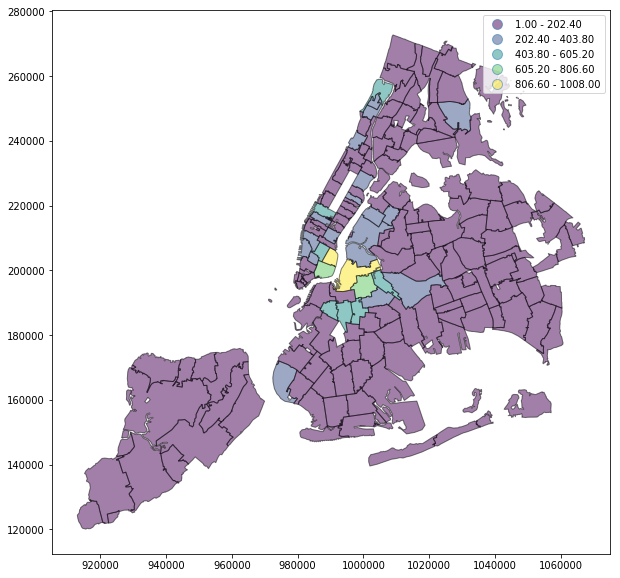

In [513]:
fig, ax = plt.subplots(figsize=(10,10))
#nyc_zips.plot( ax=ax , color='grey' ,alpha=0.5)
nyu_zips.plot(column='Unique Key', ax=ax , edgecolor='black' ,alpha=0.5, cmap='viridis', legend=True , scheme = 'Equal_interval',k=5)
#nyc_streets.plot(ax=ax,alpha=0.1)

#y.plot(column='Unique Key', ax=ax,markersize=2.00 , cmap='viridis_r' , legend=True, scheme = 'Equal_interval', k = 5)
# plot the noisiest points here:


In [554]:
nyu_zips.set_index('zcta' , inplace=True)

In [555]:
nyu_zips

bcode  note                                           geometry  \
zcta                                                                    
10001  36061  None  POLYGON ((983229.2383424834 211922.5816751101,...   
10002  36061  None  POLYGON ((985096.3850784544 198703.5457405522,...   
10003  36061  None  POLYGON ((986450.4858028748 203647.5975069208,...   
10004  36061  None  (POLYGON ((976856.663963466 189102.0183191186,...   
10005  36061  None  POLYGON ((981746.6308157594 196240.0595342411,...   
10006  36061  None  POLYGON ((980084.2480264589 196593.6878922125,...   
10007  36061  None  POLYGON ((981348.7582099339 198508.058922483, ...   
10009  36061  None  POLYGON ((991122.3619759466 201317.1174150511,...   
10010  36061  None  POLYGON ((989164.364256258 207429.0247577112, ...   
10011  36061  None  POLYGON ((983229.2383424834 211922.5816751101,...   
10012  36061  None  POLYGON ((983476.9801231649 204241.3696509083,...   
10013  36061  None  POLYGON ((981688.7988137298 199959.877258517, ...   
10014  36061  None  POLYGON ((983295.045736098 208425.3572738953, ...   
10016  36061  None  POLYGON ((988788.1953106044 212421.755221264, ...   
10017  36061  None  POLYGON ((992960.9532611957 211585.6588337964,...   
10018  36061  None  POLYGON ((985049.8539482643 214203.6578746985,...   
10019  36061  None  POLYGON ((986271.9471383464 217415.3216054293,...   
10020  36061  None  (POLYGON ((989545.2338407208 215899.8262413288...   
10021  36061  None  (POLYGON ((997818.1122071457 218236.5939727234...   
10022  36061  None  POLYGON ((992744.157546021 217458.9866564025, ...   
10023  36061  None  POLYGON ((989758.7270743432 220001.8991892759,...   
10024  36061  None  POLYGON ((987788.5122744564 223819.0193550232,...   
10025  36061  None  POLYGON ((994767.780829157 232747.9680708945, ...   
10026  36061  None  (POLYGON ((995824.2409830134 230942.8041101813...   
10027  36061  None  POLYGON ((996462.556808496 233948.5189062576, ...   
10028  36061  None  POLYGON ((998768.4550776331 220206.3652446466,...   
10029  36061  None  POLYGON ((999519.6557361392 230738.2712793827,...   
10030  36061  None  POLYGON ((1001261.975070583 237040.9787088952,...   
10031  36061  None  POLYGON ((998052.0813051873 243227.9240645149,...   
10032  36061  None  POLYGON ((1000128.240830718 247587.3998459563,...   
...      ...   ...                                                ...   
11374  36081  None  POLYGON ((1021235.087844169 202161.8708473469,...   
11375  36081  None  POLYGON ((1026234.314861294 208531.2326390767,...   
11377  36081  None  POLYGON ((1009237.776084457 213108.2088683189,...   
11378  36081  None  POLYGON ((1006565.950752507 199319.3017244898,...   
11379  36081  None  POLYGON ((1014420.428348545 201413.9481092305,...   
11385  36081  None  POLYGON ((1007870.541099141 196209.518691475, ...   
11411  36081  None  POLYGON ((1058033.568441677 189185.247793696, ...   
11412  36081  None  POLYGON ((1050399.359515723 197369.4517785781,...   
11413  36081  None  POLYGON ((1058099.29793075 187543.0448887264, ...   
11414  36081  None  (POLYGON ((1024294.427315204 181150.3527789403...   
11415  36081  None  POLYGON ((1030046.813109178 197861.7538871439,...   
11416  36081  None  POLYGON ((1029956.227833857 188981.3972710723,...   
11417  36081  None  POLYGON ((1022519.664567668 186278.7010744851,...   
11418  36081  None  POLYGON ((1030046.813109178 197861.7538871439,...   
11419  36081  None  POLYGON ((1034540.265724528 188254.5077435806,...   
11420  36081  None  POLYGON ((1031405.155127142 187077.6294592757,...   
11421  36081  None  POLYGON ((1024373.625956493 195010.3045813923,...   
11422  36081  None  POLYGON ((1056376.036323418 181569.0476169038,...   
11423  36081  None  (POLYGON ((1045985.549551827 199560.5785989111...   
11426  36081  None  POLYGON ((1059624.198789398 212648.3987174395,...   
11428  36081  None  POLYGON ((1052460.095588887 201531.8140925585,...   
11432  36081  None  POLYGON ((1038013.075051642 201990.2910589786

In [521]:
ai_noise.columns

Index(['age_m', 'sex_ratio', 'Income_m', 'Households', 'Unique Key'], dtype='object')

In [522]:
ai_noise_duplicates = ai_noise.reset_index()

In [524]:
ai_noise_duplicates.rename(columns={'index' : 'zcta'} , inplace=True)

In [526]:
ai_noise_duplicates.drop('Unique Key' , axis=1)

zcta      age_m  sex_ratio      Income_m  Households
0    10001.0  35.800000   108.0000   85168.00000     11967.0
1    10002.0  41.100000    93.0000   35594.00000     33327.0
2    10003.0  32.200000    93.5000  100791.00000     27258.0
3    10004.0  33.900000    85.2000  123056.00000      1592.0
4    10005.0  29.500000    93.2000  130116.00000      4295.0
5    10006.0  31.000000    72.9000  125364.00000      1776.0
6    10007.0  35.900000   143.8000  234958.00000      2743.0
7    10009.0  36.300000    80.4000   60788.00000     30062.0
8    10010.0  35.000000   102.2000  110142.00000     16070.0
9    10011.0  39.900000   102.0000  114134.00000     28738.0
10   10012.0  34.100000   105.7000  101815.00000     12240.0
11   10013.0  36.900000    98.3000  104167.00000     11934.0
12   10014.0  36.600000   104.8000  119026.00000     18671.0
13   10016.0  33.300000    83.0000  102703.00000     28359.0
14   10017.0  37.700000    91.6000  106795.00000     10134.0
15   10018.0  31.200000    99.0000  105479.00000      4956.0
16   10019.0  39.200000   104.3000   94477.00000     23465.0
17   10020.0  42.767812   107.6576   65581.19039         0.0
18   10021.0  38.400000    80.4000  115681.00000     24558.0
19   10022.0  45.900000    80.7000  123693.00000     17619.0
20   10023.0  42.500000    82.4000  115080.00000     33144.0
21   10024.0  43.000000    85.1000  118594.00000     28809.0
22   10025.0  40.600000    79.2000   80025.00000     42783.0
23   10026.0  34.400000    89.2000   52082.00000     14803.0
24   10027.0  30.600000    87.3000   42754.00000     22933.0
25   10028.0  39.600000    78.8000  111302.00000     25837.0
26   10029.0  33.600000    84.2000   32500.00000     30640.0
27   10030.0  34.100000    91.8000   33720.00000     11878.0
28   10031.0  34.400000    98.5000   41848.00000     21881.0
29   10032.0  34.200000   101.7000   40054.00000     20140.0
..       ...        ...        ...           ...         ...
143  11374.0  43.900000    88.5000   55550.00000     19271.0
144  11375.0  41.600000    87.3000   72982.00000     32354.0
145  11377.0  37.300000   102.2000   51675.00000     31603.0
146  11378.0  38.300000    95.3000   61631.00000     12506.0
147  11379.0  43.300000    88.5000   75320.00000     13456.0
148  11385.0  35.300000    97.3000   60526.00000     34919.0
149  11411.0  44.000000    82.1000   81678.00000      6034.0
150  11412.0  39.300000    82.0000   71995.00000     11019.0
151  11413.0  38.400000    82.6000   80758.00000     12367.0
152  11414.0  45.100000    89.8000   70490.00000     10477.0
153  11415.0  38.000000    90.5000   64055.00000      8324.0
154  11416.0  35.000000    94.6000   59092.00000      7173.0
155  11417.0  36.800000    95.7000   66978.00000      9264.0
156  11418.0  33.900000   102.0000   63079.00000     11062.0
157  11419.0  36.200000   103.2000   62014.00000     12673.0
158  11420.0  36.800000    93.1000   61484.00000     13321.0
159  11421.0  36.100000    97.5000   64544.00000     12120.0
160  11422.0  36.100000    83.2000   85436.00000      9602.0
161  11423.0  39.900000    92.3000   66070.00000      9633.0
162  11426.0  37.900000    96.1000   77487.00000      6240.0
163  11428.0  39.800000    93.3000   68675.00000      5566.0
164  11432.0  35.200000    89.4000   52277.00000     18487.0
165  11433.0  33.600000    87.8000   45820.00000     10398.0
166  11434.0  36.600000    78.9000   57454.00000     20968.0
167  11435.0  35.800000    99.1000   55268.00000     18979.0
168  11436.0  35.700000    95.8000   66837.00000      5494.0
169  11691.0  31.900000    83.0000   41190.00000     19869.0
170  11693.0  40.600000   101.3000   53829.00000      4751.0
171  11694.0  46.100000   105.0000   79145.00000      8150.0
172  11697.0  47.500000    93.9000  100909.00000      1496.0

[173 rows x 5 columns]

In [529]:
ai_noise_duplicates.set_index('zcta' ,inplace=True)

In [530]:
ai_noise_duplicates

age_m  sex_ratio      Income_m  Households  Unique Key
zcta                                                               
10001.0  35.800000   108.0000   85168.00000     11967.0       163.0
10002.0  41.100000    93.0000   35594.00000     33327.0       772.0
10003.0  32.200000    93.5000  100791.00000     27258.0       580.0
10004.0  33.900000    85.2000  123056.00000      1592.0         9.0
10005.0  29.500000    93.2000  130116.00000      4295.0        10.0
10006.0  31.000000    72.9000  125364.00000      1776.0         8.0
10007.0  35.900000   143.8000  234958.00000      2743.0        16.0
10009.0  36.300000    80.4000   60788.00000     30062.0       889.0
10010.0  35.000000   102.2000  110142.00000     16070.0       111.0
10011.0  39.900000   102.0000  114134.00000     28738.0       222.0
10012.0  34.100000   105.7000  101815.00000     12240.0       256.0
10013.0  36.900000    98.3000  104167.00000     11934.0       156.0
10014.0  36.600000   104.8000  119026.00000     18671.0       334.0
10016.0  33.300000    83.0000  102703.00000     28359.0       280.0
10017.0  37.700000    91.6000  106795.00000     10134.0        88.0
10018.0  31.200000    99.0000  105479.00000      4956.0        33.0
10019.0  39.200000   104.3000   94477.00000     23465.0       411.0
10020.0  42.767812   107.6576   65581.19039         0.0         2.0
10021.0  38.400000    80.4000  115681.00000     24558.0        92.0
10022.0  45.900000    80.7000  123693.00000     17619.0        83.0
10023.0  42.500000    82.4000  115080.00000     33144.0        43.0
10024.0  43.000000    85.1000  118594.00000     28809.0        76.0
10025.0  40.600000    79.2000   80025.00000     42783.0       177.0
10026.0  34.400000    89.2000   52082.00000     14803.0        85.0
10027.0  30.600000    87.3000   42754.00000     22933.0       162.0
10028.0  39.600000    78.8000  111302.00000     25837.0       207.0
10029.0  33.600000    84.2000   32500.00000     30640.0       307.0
10030.0  34.100000    91.8000   33720.00000     11878.0       190.0
10031.0  34.400000    98.5000   41848.00000     21881.0       233.0
10032.0  34.200000   101.7000   40054.00000     20140.0       157.0
...            ...        ...           ...         ...         ...
11374.0  43.900000    88.5000   55550.00000     19271.0        10.0
11375.0  41.600000    87.3000   72982.00000     32354.0        90.0
11377.0  37.300000   102.2000   51675.00000     31603.0       131.0
11378.0  38.300000    95.3000   61631.00000     12506.0        27.0
11379.0  43.300000    88.5000   75320.00000     13456.0         3.0
11385.0  35.300000    97.3000   60526.00000     34919.0       282.0
11411.0  44.000000    82.1000   81678.00000      6034.0        10.0
11412.0  39.300000    82.0000   71995.00000     11019.0         8.0
11413.0  38.400000    82.6000   80758.00000     12367.0         3.0
11414.0  45.100000    89.8000   70490.00000     10477.0       156.0
11415.0  38.000000    90.5000   64055.00000      8324.0       126.0
11416.0  35.000000    94.6000   59092.00000      7173.0        20.0
11417.0  36.800000    95.7000   66978.00000      9264.0        47.0
11418.0  33.900000   102.0000   63079.00000     11062.0       131.0
11419.0  36.200000   103.2000   62014.00000     12673.0        66.0
11420.0  36.800000    93.1000   61484.00000     13321.0        51.0
11421.0  36.100000    97.5000   64544.00000     12120.0        38.0
11422.0  36.100000    83.2000   85436.00000      9602.0         4.0
11423.0  39.900000    92.3000   66070.00000      9633.0        11.0
11426.0  37.900000    96.1000   77487.00000      6240.0         1.0
11428.0  39.800000    93.3000   68675.00000      5566.0        19.0
11432.0  35.200000    89.4000   52277.00000     18487.0        50.0
11433.0  33.600000    87.8000   45820.00000     10398.0        76.0
11434.0  36.600000    78.9000   57454.00000     20968.0        38.0
11435.0  35.800000    99.1000   55268.00000     18979.0        16.0
11436.0  35.700000    95.8000   66837.00000      5494.0         1.0
1

In [565]:
nyu_zips1 = pd.merge(nyu_zips, ai_noise_duplicates ,left_index=True, right_index=True)

In [566]:
nyu_zips1

bcode  note                                           geometry  \
zcta                                                                      
10001.0  36061  None  POLYGON ((983229.2383424834 211922.5816751101,...   
10002.0  36061  None  POLYGON ((985096.3850784544 198703.5457405522,...   
10003.0  36061  None  POLYGON ((986450.4858028748 203647.5975069208,...   
10004.0  36061  None  (POLYGON ((976856.663963466 189102.0183191186,...   
10005.0  36061  None  POLYGON ((981746.6308157594 196240.0595342411,...   
10006.0  36061  None  POLYGON ((980084.2480264589 196593.6878922125,...   
10007.0  36061  None  POLYGON ((981348.7582099339 198508.058922483, ...   
10009.0  36061  None  POLYGON ((991122.3619759466 201317.1174150511,...   
10010.0  36061  None  POLYGON ((989164.364256258 207429.0247577112, ...   
10011.0  36061  None  POLYGON ((983229.2383424834 211922.5816751101,...   
10012.0  36061  None  POLYGON ((983476.9801231649 204241.3696509083,...   
10013.0  36061  None  POLYGON ((981688.7988137298 199959.877258517, ...   
10014.0  36061  None  POLYGON ((983295.045736098 208425.3572738953, ...   
10016.0  36061  None  POLYGON ((988788.1953106044 212421.755221264, ...   
10017.0  36061  None  POLYGON ((992960.9532611957 211585.6588337964,...   
10018.0  36061  None  POLYGON ((985049.8539482643 214203.6578746985,...   
10019.0  36061  None  POLYGON ((986271.9471383464 217415.3216054293,...   
10020.0  36061  None  (POLYGON ((989545.2338407208 215899.8262413288...   
10021.0  36061  None  (POLYGON ((997818.1122071457 218236.5939727234...   
10022.0  36061  None  POLYGON ((992744.157546021 217458.9866564025, ...   
10023.0  36061  None  POLYGON ((989758.7270743432 220001.8991892759,...   
10024.0  36061  None  POLYGON ((987788.5122744564 223819.0193550232,...   
10025.0  36061  None  POLYGON ((994767.780829157 232747.9680708945, ...   
10026.0  36061  None  (POLYGON ((995824.2409830134 230942.8041101813...   
10027.0  36061  None  POLYGON ((996462.556808496 233948.5189062576, ...   
10028.0  36061  None  POLYGON ((998768.4550776331 220206.3652446466,...   
10029.0  36061  None  POLYGON ((999519.6557361392 230738.2712793827,...   
10030.0  36061  None  POLYGON ((1001261.975070583 237040.9787088952,...   
10031.0  36061  None  POLYGON ((998052.0813051873 243227.9240645149,...   
10032.0  36061  None  POLYGON ((1000128.240830718 247587.3998459563,...   
...        ...   ...                                                ...   
11374.0  36081  None  POLYGON ((1021235.087844169 202161.8708473469,...   
11375.0  36081  None  POLYGON ((1026234.314861294 208531.2326390767,...   
11377.0  36081  None  POLYGON ((1009237.776084457 213108.2088683189,...   
11378.0  36081  None  POLYGON ((1006565.950752507 199319.3017244898,...   
11379.0  36081  None  POLYGON ((1014420.428348545 201413.9481092305,...   
11385.0  36081  None  POLYGON ((1007870.541099141 196209.518691475, ...   
11411.0  36081  None  POLYGON ((1058033.568441677 189185.247793696, ...   
11412.0  36081  None  POLYGON ((1050399.359515723 197369.4517785781,...   
11413.0  36081  None  POLYGON ((1058099.29793075 187543.0448887264, ...   
11414.0  36081  None  (POLYGON ((1024294.427315204 181150.3527789403...   
11415.0  36081  None  POLYGON ((1030046.813109178 197861.7538871439,...   
11416.0  36081  None  POLYGON ((1029956.227833857 188981.3972710723,...   
11417.0  36081  None  POLYGON ((1022519.664567668 186278.7010744851,...   
11418.0  36081  None  POLYGON ((1030046.813109178 197861.7538871439,...   
11419.0  36081  None  POLYGON ((1034540.265724528 188254.5077435806,...   
11420.0  36081  None  POLYGON ((1031405.155127142 187077.6294592757,...   
11421.0  36081  None  POLYGON ((1024373.625956493 195010.3045813923,...   
11422.0  36081  None  POLYGON ((1056376.036323418 181569.0476169038,...   
11423.0  36081  None  (POLYGON ((1045985.549551827 199560.5785989111...   
11426.0  36081  None  POLYGON ((1059624.198789398 212648.3987174395,...   
11428.0  36081  None  POLYGON ((10

In [569]:
#perform geographic weighted regression
# develop the nearest neighbor weighted matrix and row standarize it
path1='Output/bars_noise_311_zip.shp'
nyu_zips1.to_file(path1)

In [570]:
qW_CT_zip = ps.queen_from_shapefile(path1)

Island ids:  [69, 165]


In [572]:
Wmatrix_zips, ids_zips = qW_CT_zip.full()

In [573]:
qW_CT_zip.transform = 'r'

In [574]:
nyu_zips1['lognoise'] = np.log(nyu_zips1['Unique Key_y'])

In [575]:
nyu_zips1['lognoise'] = nyu_zips1['lognoise'] + 0.000001

In [578]:
independent_variables = nyu_zips1[[ 'age_m' , 'sex_ratio' ,'Income_m' , 'Households']]


In [631]:
model1 = ps.spreg.OLS(Output , X ,  w = qW_CT_zip , spat_diag=True, name_x = ['age_m', 'sex_ratio', 'Income_m', 'Households'] , name_y = 'ln(noise complaints)' )

In [632]:
print(model1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :ln(noise complaints)                Number of Observations:         169
Mean dependent var  :      3.7729                Number of Variables   :           5
S.D. dependent var  :      1.6078                Degrees of Freedom    :         164
R-squared           :      0.2889
Adjusted R-squared  :      0.2716
Sum squared residual:     308.817                F-statistic           :     16.6589
Sigma-square        :       1.883                Prob(F-statistic)     :   1.777e-11
S.E. of regression  :       1.372                Log likelihood        :    -290.742
Sigma-square ML     :       1.827                Akaike info criterion :     591.483
S.E of regression ML:      1.3518                Schwarz criterion     :     607.133

---------------------------------------------------------------------

In [633]:
AnnualComplaints_zip = nyu_zips1['Unique Key_y']
AnnualComplaints_zipLag = ps.lag_spatial(qW_CT_zip, AnnualComplaints_zip)

In [645]:
model2 = ps.spreg.OLS(Output, X, w = qW_CT_zip , spat_diag=True, name_x = ['age_m', 'sex_ratio', 'Income_m', 'Households' ,'Lagged Noise Complaints'] , name_y = 'ln(noise complaints)' )

In [646]:
print(model2.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :ln(noise complaints)                Number of Observations:         169
Mean dependent var  :      3.7729                Number of Variables   :           6
S.D. dependent var  :      1.6078                Degrees of Freedom    :         163
R-squared           :      0.4261
Adjusted R-squared  :      0.4084
Sum squared residual:     249.262                F-statistic           :     24.1998
Sigma-square        :       1.529                Prob(F-statistic)     :   3.596e-18
S.E. of regression  :       1.237                Log likelihood        :    -272.638
Sigma-square ML     :       1.475                Akaike info criterion :     557.275
S.E of regression ML:      1.2145                Schwarz criterion     :     576.055

---------------------------------------------------------------------

In [ ]:
m3 = ps.spreg.GM_Lag(Output, yxs.drop('price', axis=1).values, \
                  w=w, spat_diag=True, \
                  name_x=, name_y='ln(price)')

In [635]:
X = []

In [636]:
X.append(independent_variables['age_m'].values)

In [637]:
X.append(independent_variables['sex_ratio'].values)

In [638]:
X.append(independent_variables['Income_m'].values)

In [639]:
X.append(independent_variables['Households'].values)

In [640]:
X.append(AnnualComplaints_zipLag)

In [641]:
X = np.array(X).T

In [642]:
X.ndim

2

In [620]:
 Output = nyu_zips1['lognoise'].values

In [623]:
Output.shape = (nyu_zips1['lognoise'].size, 1)

In [625]:
Output.ndim

2